# Credit EDA Case Study - Answer Sheet #1

### Problem Statement

The loan providing companies finds it hard to give loans to the people due to their insufficient or non-existent credit history. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

>1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
>2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

### <font color=blue>**Overall Approach Followed**</font>:  
1. Import the Current Application Dataset and observe issues with data as missing values, outliers, imbalance in data etc.
2. Take corrective actions like imputing/deleting null rows/columns, removing/retaining outliers etc. as required
3. Perform Univariate and Bivariate analysis on the cleansed dataset and derive insights
4. Divide Current Application Dataset into two parts: Part A: with Target variable 1 and Part B: with Target variable 0
5. Perform Correlation analysis on each of the two datasets and derive insights. Identify the top columns that are highly correlated. Compare between the two Correlation analysis i.e. for Target Variable 0 and Target Variable 1 to identify if there are any differences in the correlation of the columns
6. Derive inferences from all the above analysis
7. Import the Previous Application Dataset and observe issues with data as missing values, outliers, imbalance in data etc.
8. Take corrective actions like imputing/deleting null rows/columns, removing/retaining outliers etc. as required
9. Merge the Previous Appplication Dataset with the Target 1 dataset and with Target 0 dataset
10. Perform Correlation analysis on both the merged datasets. Derive insights from each of them independently and  by comparing them.
11. Perform Univariate and Bivariate analysis on the two merged datasets
12. Arrive at Final Conclusion including which columns are the strong indicators/predictors of Target variable 1 and 0

### This file mostly consists of the analysis of Application Data

### The analysis of Previous Application Data is in a separate file - "Answer Sheet #2 - Previous Application and Merged Analysis.ipynb". The same file also has analysis of the merged data of both the datasets

### <font color=blue>**Inputs to this file**</font>:  
>1. application_data.csv
>2. columns_description.csv (for Metadata analysis)

### <font color=blue>**Outputs of this file**</font>:  
>1. Metadata_Details_Application_Data.csv
>2. Some interim Checkpoint csv
>3. Target 0 Dataset csv [loan_appl_0_target_df] (for importing it in Answer sheet #2)
>4. Target 1 Dataset csv [loan_appl_1_target_df] (for importing it in Answer sheet #2)

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling

import pandas_profiling

In [86]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Understanding

- Understanding the structure of Data
- Identifying the Data Quality Issues through profiling
- Performing required Data Cleansing and Manipulation Operations

In [367]:
# Reading the Application Data Set

loan_appl = pd.read_csv('application_data.csv')

In [368]:
# Check the number of duplicate rows

loan_appl_update = loan_appl.drop_duplicates(keep='first') 

print(loan_appl.shape)
print(loan_appl_update.shape)

(307511, 122)
(307511, 122)


<font color=blue>**Inference**</font>:  
- There are no duplicate rows in Application Data set

### Creating Metadata File of Application Data
Objective is to:
1. Identify the data type of each of the columns
2. Identify the number and % of missing values in each of the columns
3. Identify the number of unique values per column

In [369]:
# Read the provided Metadata file

metadata_df = pd.read_csv('columns_description.csv',encoding='ISO-8859-1')

In [370]:
# Filter out only rows applicable to Application Data from Columns_description

metadata_df_appl = metadata_df[metadata_df['Table'] == 'application_data']

In [371]:
# Identify the Data Type of each column of Application Data

temp_list = []

for name, dtype in loan_appl.dtypes.iteritems():
    temp_list.append(dtype)

In [372]:
# Insert the Data type data in the metadata sheet

metadata_df_appl.insert(5,'Type',temp_list,True)

In [373]:
# Check for number of NULL values per column
temp_list = []
num_null_percol = loan_appl.isnull().sum()
for name, value in num_null_percol.iteritems():
    temp_list.append(value)

In [374]:
# Insert the Number of NULL values in the metadata sheet

metadata_df_appl.insert(6,'NULL_Count',temp_list,True)

In [375]:
# Calculate the % of NULL Values per column
temp_list = []
percent_null_percol = round(loan_appl.isnull().sum()*100/len(loan_appl),2)
for name, value in percent_null_percol.iteritems():
    temp_list.append(round(value,2))

In [376]:
# Insert the % of NULL values in the metadata sheet

metadata_df_appl.insert(7,'NULL_Percent',temp_list,True)

In [377]:
# Calculate the number of unique values per column
temp_list = []
for i in range(len(loan_appl.columns)):
    temp_list.append(loan_appl.iloc[:,i].nunique())

In [378]:
# Insert the number of unique values in the metadata sheet

metadata_df_appl.insert(8,'Unique_Count',temp_list,True)

In [379]:
# Save Metadata details of Application data 
# Checkpoint 1
metadata_df_appl.to_csv('Metadata_Details_Application_Data.csv')

In [380]:
# Filter out columns with more than 50% missing data

print(metadata_df_appl[(metadata_df_appl['NULL_Percent'] >= 50)]['Row'])

21                 OWN_CAR_AGE
41                EXT_SOURCE_1
44              APARTMENTS_AVG
45            BASEMENTAREA_AVG
47             YEARS_BUILD_AVG
48              COMMONAREA_AVG
49               ELEVATORS_AVG
50               ENTRANCES_AVG
52               FLOORSMIN_AVG
53                LANDAREA_AVG
54        LIVINGAPARTMENTS_AVG
55              LIVINGAREA_AVG
56     NONLIVINGAPARTMENTS_AVG
57           NONLIVINGAREA_AVG
58             APARTMENTS_MODE
59           BASEMENTAREA_MODE
61            YEARS_BUILD_MODE
62             COMMONAREA_MODE
63              ELEVATORS_MODE
64              ENTRANCES_MODE
66              FLOORSMIN_MODE
67               LANDAREA_MODE
68       LIVINGAPARTMENTS_MODE
69             LIVINGAREA_MODE
70    NONLIVINGAPARTMENTS_MODE
71          NONLIVINGAREA_MODE
72             APARTMENTS_MEDI
73           BASEMENTAREA_MEDI
75            YEARS_BUILD_MEDI
76             COMMONAREA_MEDI
77              ELEVATORS_MEDI
78              ENTRANCES_MEDI
80      

<font color=Blue>**Observation**</font>:  
- Most of these columns having \>=50% of missing values are related to granular details of the building where the client lives
- Considering the amount of missing values and from a decision making perspective this amount of granular details may not be required our analysis
- However, we can retain some columns like 'OWN_CAR_AGE' and 'HOUSETYPE_MODE'. 
>1. 'OWN_CAR_AGE' gives a sense of for how long the client has owned a high value asset which may give some indication in the analysis later
>2. 'HOUSETYPE_MODE' could also be useful in further analysis to see if there are some patterns related to owning a flat vs indepdendent house

In [381]:
# Remove columns with more than 50% missing data except those identified as potentially relevant for future analysis

for i, value in metadata_df_appl[(metadata_df_appl['NULL_Percent'] >= 50)]['Row'].iteritems():
    if (value != 'OWN_CAR_AGE' and value !='HOUSETYPE_MODE'):
        loan_appl = loan_appl.drop(value, axis=1)

In [382]:
# Make same deletions in the Metadata data frame

metadata_df_appl = metadata_df_appl[(metadata_df_appl['NULL_Percent'] <50) | (metadata_df_appl['Row'] == 'OWN_CAR_AGE') | (metadata_df_appl['Row'] == 'HOUSETYPE_MODE')]

In [383]:
# Filter out columns with more than 40% missing data
print(metadata_df_appl.shape)
print(metadata_df_appl[(metadata_df_appl['NULL_Percent'] >= 40)]['Row'])

(83, 9)
21                     OWN_CAR_AGE
46     YEARS_BEGINEXPLUATATION_AVG
51                   FLOORSMAX_AVG
60    YEARS_BEGINEXPLUATATION_MODE
65                  FLOORSMAX_MODE
74    YEARS_BEGINEXPLUATATION_MEDI
79                  FLOORSMAX_MEDI
87                  HOUSETYPE_MODE
88                  TOTALAREA_MODE
90             EMERGENCYSTATE_MODE
Name: Row, dtype: object


<font color=Blue>**Observation**</font>:  
- Most of these columns having \>=40% of missing values are again related to granular details of the building where the client lives
- Considering the amount of missing values and from a decision making perspective this amount of granular details may not be required our analysis
- However, we can retain 'TOTALAREA_MODE' column as this may give an indication of the income / status of the client and may be useful for future analysis. Can be discarded later if found otherwise

In [384]:
# Remove columns with more than 40% missing data except those identified as potentially relevant for future analysis

for i, value in metadata_df_appl[(metadata_df_appl['NULL_Percent'] >= 40)]['Row'].iteritems():
    if (value != 'TOTALAREA_MODE' and value != 'OWN_CAR_AGE' and value != 'HOUSETYPE_MODE' ):
        loan_appl = loan_appl.drop(value, axis=1)

In [385]:
# Make same deletions in the Metadata data frame

metadata_df_appl= metadata_df_appl[(metadata_df_appl['NULL_Percent'] < 40) | (metadata_df_appl['Row'] == 'OWN_CAR_AGE') | (metadata_df_appl['Row'] == 'HOUSETYPE_MODE') | (metadata_df_appl['Row'] == 'TOTALAREA_MODE') ]

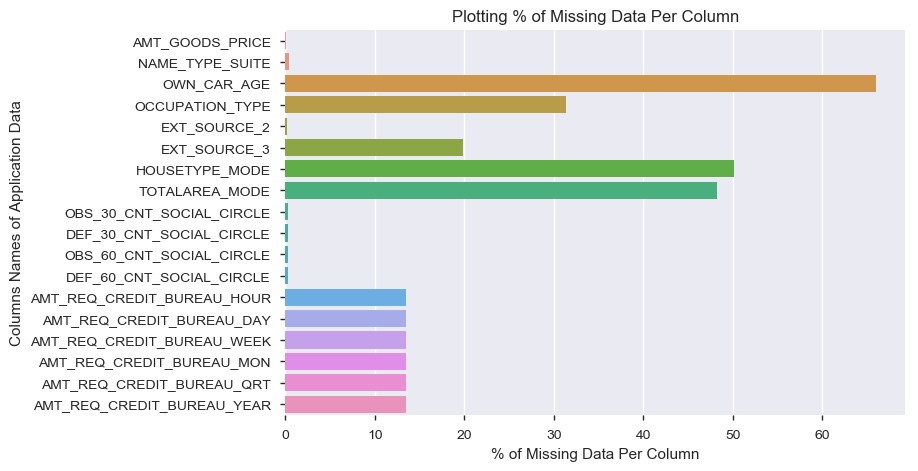

In [386]:
# Plot missing data % per col

plt.figure(figsize=(8, 5))

sns.barplot(y='Row',x='NULL_Percent',data=metadata_df_appl[metadata_df_appl['NULL_Percent'] > 0])
plt.title('% of Missing Data per column of Application Data ')
plt.xlabel('% of Missing Data Per Column')
plt.ylabel('Columns Names of Application Data')
plt.title('Plotting % of Missing Data Per Column')
plt.show() 

In [387]:
# Removing 'Ext_Source_3' column as well. As even the details of what this column represents is not clear.

loan_appl = loan_appl.drop('EXT_SOURCE_3', axis=1)

In [388]:
metadata_df_appl= metadata_df_appl[metadata_df_appl['Row'] != 'EXT_SOURCE_3']

In [389]:
# Checking the current shape of Application data
print(loan_appl.shape)

(307511, 75)


In [390]:
print(metadata_df_appl.shape)

(75, 9)


<font color=Blue>**Observation**</font>:  
- We have deleted 122-75= 47 columns.
- 'OWN_CAR_AGE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE' are 3 columns retained even after having 50% missing values
- Not imputing any values for missing data fields because HOUSETYPE_MODE and OCCUPATION_TYPE are string fields, the rest of the fields have a lot of missing values to fill up and introduce a whole range of new values which could affect further calculations.
- Therefore, leaving them AS-IS as of now
- The invalid values will be treated as required below

### Using Pandas profiling on latest Application data set to understand more aspects of data

In [391]:
pandas_profiling.ProfileReport(loan_appl)

#profile = 
#profile.to_file(outputfile="output.html")

<font color=blue>**Inference from Pandas Profiling Report**</font>:  
- Total Missing data now is very low at 3.7%
- There are 17 columns with some missing data

- Data Types:
> - Numeric - 26
> - Categorical - 13
> - Boolean - 33
> - No Date columns

- The 6 columns related to 'Number of enquiries to Credit Bureau about the client' are all have constant % of missing values irrespective of the time frame of when the enquiries were made. This could imply that this data for some clients was never collected.

In [394]:
# Check Point 2
# Saving the data sets at end of Check Point 2. This to do some further analysis on the data sets in tabular / excel format

loan_appl.to_csv('loan_appl_checkpoint_2.csv')
metadata_df_appl.to_csv('metadata_df_appl_checkpoint_2.csv')

### <font color=blue>Data Type Mismatch</font>:  
#### *Inference from visually analyzing the datasets**
#### There is no Data Type mistmatch.
#### All the strings are of 'object' type and rest numericals are either 'int' or 'float' type

### <font color=blue>Univariate Analysis and Study of Data Imbalance</font>:  

#### **Inference from visually analyzing the Pandas Profiling**
#### **Potential Data Imbalances are correspondingly flagged post each analysis if applicable**

##### [Univariate Analysis: Target]
1. 92% of the clients had no payment difficulties
> [[Data Imbalance]]

##### [Univariate Analysis: Gender]

2. The Gender ratio Female:Male is 66:34 implying that there is a disproportionate representation of Female records in the data compared to male records 

##### [Univariate Analysis: Family Status]

3. 70% of the clients dont not have children. This could imply that data is skewed towards more of single/unmarried men/women

4. 55% of the clients have 2 people in their family. Combining this with the point 2 above it could imply that most of the clients taking loan are newly wed couples 

5. Almost ~64% (married) + ~10% (civil marriage) = ~75% of the clients are married

##### [Univariate Analysis: Education Details]

6. 71% of the clients have "Secondary / Seconday special" as education level. Also, 24% of clients have "higher" education level. This implies that there is neglible representation from either extremes of the spectrum i.e. from "lower secondary" or with "Academic degree"


##### [Univariate Analysis: Address Details]

7. ~89% of the clients live in a "House/Apartment". This could imply owning a "House/Apartment" as there is a separate metric to capture "Rented house". Also, this could imply that they are living independently as there is an option of "living with parents"
> [[Data Imbalance]]

8. 82% of the clients contact address city doesnt match their work address city. Implying most of the clients work out of offices. Could be pointing towards working professionals more than self-run businesses. Going by the variable name it could also imply that majority of the clients travel to nearby city daily for work.

9. 95% of the clients contact address region doesnt match their work address region. This further strengthens the posssible conclusions from point 6 above
> [[Data Imbalance]]

##### [Univariate Analysis: Contact Details]

10. ~94% clients didnt provide their email id for contact purposes.
> [[Data Imbalance]]

11. 100% clients provided their mobile number. Whereas, 82% client provided their work phone number

##### [Univariate Analysis: Property Ownership]

12. ~70:30 ratio of clients owning a Reality Asset to not owning them

13. 66% of the clients own a Car

14. Out of the non missing records a majority of the clients i.e. 50% (of the overall) own a "block of flats" type of house instead of the other options which are negligble

##### [Univariate Analysis: Loan Details]

15. 90% of the clients have preferred cash loans vis-a-vis a revolving loan
> [[Data Imbalance]]

##### [Univariate Analysis: Income Type]

16. ~52% are classified as "Working" and 23% as "Commercial associate" and ~25% (18(Pensioner)+7(state servant)) as current or Ex. government employee. Given the categories it implies that most of the "Working" people could fall in the "Unorganized sector".

17. There is very negligable represenation from unemployed / student population

##### [Univariate Analysis: Occupation Type]

18. ~31% data is missing. This could imply that these are contract workers?

19. Also, with ~18% of laborers, and looking at other occupation type it could imply that most of the clients are in blue-collared jobs

##### [Univariate Analysis: Documents Submitted]

20. 99% of the clients have not submitted any of the documents listed here except for DOCUMENT_3 to some extent
> [[Data Imbalance]]

### <font color=blue>**Treating Invalid Values**</font>:  

In [395]:
# Treating Invalid Values

# Replace invalid Gender codes with Null values
loan_appl['CODE_GENDER'] = loan_appl['CODE_GENDER'].replace('XNA',np.NaN)

In [396]:
loan_appl['ORGANIZATION_TYPE'] = loan_appl['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

### <font color=blue>**Imputing NaN values /Deleting NULL values in Categorical and Numeric Variables**</font>:  

In [397]:
loan_appl['CODE_GENDER'].fillna(value=loan_appl['CODE_GENDER'].value_counts().index[0],inplace=True)
#loan_appl['CODE_GENDER'].fillna(value=loan_appl['CODE_GENDER'].value_counts().index[0],inplace=True)

In [398]:
loan_appl['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [399]:
# Given that the max value is very high there is clearly an outlier here. Therefore it is better to use a median value than a mean value here
# This is because the mean value will be affected by the max value

loan_appl.loc[loan_appl['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = loan_appl['AMT_ANNUITY'].median()

In [400]:
loan_appl['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [401]:
# Again there is an outlier and there is a lot of difference between (75th and 25th quartile). Therefore, replacing by Mean / Median will introduce a lot of bias in the data
# Therefore, it better to delete the rows with NULL values

loan_appl['AMT_GOODS_PRICE'].replace('',np.NaN,inplace=True)

loan_appl = loan_appl[~np.isnan(loan_appl['AMT_GOODS_PRICE'])]
loan_appl.shape

(307233, 75)

In [402]:
loan_appl['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [403]:
# Replacing missing values with most frequently used values

loan_appl.loc[loan_appl['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE'] = loan_appl['NAME_TYPE_SUITE'].value_counts().index[0]
loan_appl.shape

(307233, 75)

In [404]:
# Calculating missing values in more columns

print(loan_appl['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(loan_appl['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(loan_appl['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(loan_appl['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

1021
1021
1021
1


In [405]:
# Imputing Missing values

loan_appl.loc[loan_appl['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_30_CNT_SOCIAL_CIRCLE'] = loan_appl['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts().index[0]
loan_appl.loc[loan_appl['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_60_CNT_SOCIAL_CIRCLE'] = loan_appl['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().index[0]
loan_appl.loc[loan_appl['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_60_CNT_SOCIAL_CIRCLE'] = loan_appl['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts().index[0]
loan_appl.loc[loan_appl['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE'] = loan_appl['DAYS_LAST_PHONE_CHANGE'].value_counts().index[0]

In [406]:
# From Data Profiling results it could be seen that the below variable on the number of enquiries have consistent % of missing data
# AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_Q, AMT_REQ_CREDIT_BUREAU_YEAR
# Since the % are high >10%, deleting the rows will be better option than introducing new values in a large extent which could introduce bias

loan_appl['AMT_REQ_CREDIT_BUREAU_HOUR'].replace('',np.NaN,inplace=True)
loan_appl = loan_appl[~np.isnan(loan_appl['AMT_REQ_CREDIT_BUREAU_HOUR'])]

In [407]:
print(loan_appl.shape)

#print(loan_appl.isnull().any())
print(loan_appl.columns[loan_appl.isnull().any()])

(265760, 75)
Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE'],
      dtype='object')


In [408]:
loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    264909.000000
mean          1.432254
std           2.419542
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [409]:
# Replacing my Median value again
loan_appl.loc[loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_30_CNT_SOCIAL_CIRCLE'] = loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'].median()

In [410]:
print(loan_appl['ORGANIZATION_TYPE'].value_counts())
print(loan_appl['ORGANIZATION_TYPE'].isnull().sum())

Business Entity Type 3    58343
Self-employed             31879
Other                     14457
Medicine                  10076
Business Entity Type 2     9448
Government                 9252
School                     7980
Trade: type 7              6534
Kindergarten               6153
Construction               5703
Business Entity Type 1     5268
Transport: type 4          4688
Industry: type 9           3061
Trade: type 3              2978
Industry: type 3           2848
Security                   2807
Housing                    2591
Industry: type 11          2359
Military                   2359
Bank                       2265
Police                     2145
Transport: type 2          2048
Agriculture                2016
Postal                     1841
Security Ministries        1826
Trade: type 2              1548
Restaurant                 1498
Services                   1356
University                 1183
Industry: type 7           1156
Transport: type 3           977
Industry

In [411]:
# From above it is clear that there are lots of rows missing and the spread of data is also not skewed to replace the blank values with most frequent count value
# Therefore, deleting the missing rows would be better
loan_appl = loan_appl[loan_appl['ORGANIZATION_TYPE'].notnull()]
loan_appl.shape

(218064, 75)

In [412]:
# Dropping further columns with 50% of missing values
loan_appl = loan_appl.drop(['OWN_CAR_AGE','HOUSETYPE_MODE'], axis=1)

In [413]:
loan_appl['OCCUPATION_TYPE'].describe()
loan_appl['OCCUPATION_TYPE'].isnull().sum()

35426

In [414]:
# Findings are similar to Organization type above therefor, deleting the missing rows here as well

loan_appl = loan_appl[loan_appl['OCCUPATION_TYPE'].notnull()]
loan_appl.shape

(182638, 73)

In [415]:
loan_appl['EXT_SOURCE_2'].isnull().sum()

319

In [416]:
# EXT_SOURCE_2 is a normalized variable, with just 319 missing values. Therefore, imputing them with median value
loan_appl.loc[loan_appl['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2'] = loan_appl['EXT_SOURCE_2'].median()

In [417]:
loan_appl['TOTALAREA_MODE'].isnull().sum()

87067

In [418]:
loan_appl['TOTALAREA_MODE'].describe()

count    95571.000000
mean         0.102418
std          0.107685
min          0.000000
25%          0.041300
50%          0.068800
75%          0.126700
max          1.000000
Name: TOTALAREA_MODE, dtype: float64

In [419]:
# TOTALAREA_MODE is a normalized variable, with a subtantial number of missing values 87067
# It is the only variable related to the Housing property related that is there having deleted many other columns due to lack of data
# Therefore, retaining it by imputing the null values with median value

loan_appl.loc[loan_appl['TOTALAREA_MODE'].isnull(),'TOTALAREA_MODE'] = loan_appl['TOTALAREA_MODE'].median()

In [420]:
# Conforming if any Null value is left

print(loan_appl.columns[loan_appl.isnull().any()])

Index([], dtype='object')


### <font color=blue>**Treating Invalid Column Names**</font>:  

> Renaming 'Work Phone' column as 'Home Phone' as per the column description

> Renaming numeric flags (1/0) as "NFLAG_*" instead of "FLAG_*" as there are string flags as wel (Y/N)

In [421]:
loan_appl = loan_appl.rename(columns={'FLAG_MOBIL':'NFLAG_MOBIL',
                          'FLAG_WORK_PHONE': 'NFLAG_HOME_PHONE', 
                          'FLAG_EMP_PHONE': 'NFLAG_WORK_PHONE',
                          'FLAG_PHONE': 'NFLAG_PHONE',
                          'FLAG_CONT_MOBILE':'NFLAG_CONT_MOBILE',
                          'FLAG_EMAIL':'NFLAG_EMAIL',
                          })

In [422]:
# Weekday columns has Weekend values as well like Saturday and Sunday. This indicates that the loan providing facility was open all the 7 days of the week or that this could be an error. 
# This needs to be investigated. For now appropriately renaming it

loan_appl = loan_appl.rename(columns={'WEEKDAY_APPR_PROCESS_START':'DAY_APPR_PROCESS_START'})

### <font color=blue>**Standardization**</font>:  

> Standardizing non-standard units

In [423]:
# Converting the Days to Years for easier analysis and understanding
# Assumption Dividing by 365 days ignoring that some people could be born in leap year. Therefore, the below calculations are approximate

loan_appl['DAYS_BIRTH'] = round((abs(loan_appl['DAYS_BIRTH']) / 365),2)
loan_appl['DAYS_EMPLOYED'] = round((abs(loan_appl['DAYS_EMPLOYED']) / 365),2)
loan_appl['DAYS_REGISTRATION'] = round((abs(loan_appl['DAYS_REGISTRATION']) / 365),2)
loan_appl['DAYS_ID_PUBLISH'] = round((abs(loan_appl['DAYS_ID_PUBLISH']) / 365),2)

In [424]:
# Renaming the columns appropriately post standardization

loan_appl = loan_appl.rename(columns={'DAYS_BIRTH':'AGE_YEARS',
                                      'DAYS_EMPLOYED':'YEARS_EMPLOYED',
                                      'DAYS_REGISTRATION':'YEARS_REGISTRATION',
                                      'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'})

### <font color=blue>**Identifying Outliers**</font>:  

In [425]:
# Function to count the number of lower and upper outliers for a given column

def identify_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    inner_fence_low  = q1-1.5*iqr
    inner_fence_high = q3+1.5*iqr
    #outer_fence_low = q1-3*iqr
    #outer_fence_high = q1+3*iqr
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print("{} number of {} column values less than inner limit".format(df_in[df_in[col_name] < inner_fence_low][col_name].count(),col_name))
    print("{} number of {} column values more than outer limit".format(df_in[df_in[col_name] > inner_fence_high][col_name].count(),col_name))
    print("\n")
    return

In [426]:
# Checking the number of lower and upper outliers for few Numerical columns

identify_outlier(loan_appl,'AMT_INCOME_TOTAL')
identify_outlier(loan_appl,'AMT_CREDIT')
identify_outlier(loan_appl,'AMT_ANNUITY')
identify_outlier(loan_appl,'AMT_GOODS_PRICE')

0 number of AMT_INCOME_TOTAL column values less than inner limit
5665 number of AMT_INCOME_TOTAL column values more than outer limit


0 number of AMT_CREDIT column values less than inner limit
4048 number of AMT_CREDIT column values more than outer limit


0 number of AMT_ANNUITY column values less than inner limit
3677 number of AMT_ANNUITY column values more than outer limit


0 number of AMT_GOODS_PRICE column values less than inner limit
5164 number of AMT_GOODS_PRICE column values more than outer limit




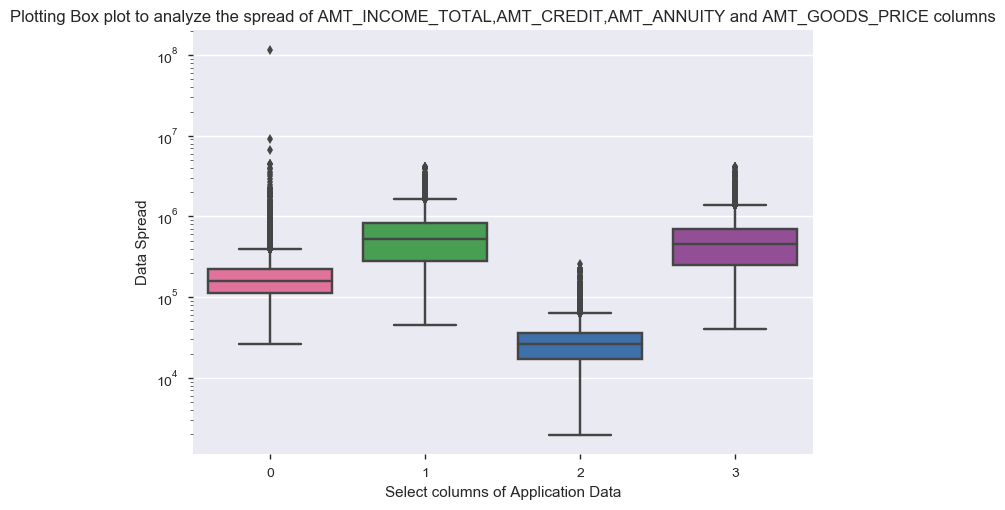

In [427]:
# Same can be observed by plotting Box plots for above variables
ax = sns.boxplot(data=[loan_appl['AMT_INCOME_TOTAL'],loan_appl['AMT_CREDIT'],loan_appl['AMT_ANNUITY'],loan_appl['AMT_GOODS_PRICE']],palette=[sns.xkcd_rgb["medium pink"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["medium blue"],sns.xkcd_rgb["medium purple"]])

ax.set(yscale='log')
plt.xlabel('Select columns of Application Data')
plt.ylabel('Data Spread')
plt.title('Plotting Box plot to analyze the spread of AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY and AMT_GOODS_PRICE columns')
plt.show()

### <font color=blue>**Inference on Outliers**</font>:  
#### From the above analysis it is clear that there are signifcant number of outliers towards the upper end for columns: AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE 
#### This could be possible because there could be few HNIs (High Net Worth) individuals who are earning significantly higher than the majority of the population (under consider). These clients may typically be borrowing higher credit for a high value goods. 
#### Therefore, though these are outliers, this should be expected

#### There are many columns with normalized values. Therefore, finding outliers for such columns doesnt make any sense

In [428]:
# Checking the number of lower and upper outliers for few more Numerical columns

identify_outlier(loan_appl,'CNT_CHILDREN')
identify_outlier(loan_appl,'CNT_FAM_MEMBERS')

0 number of CNT_CHILDREN column values less than inner limit
3010 number of CNT_CHILDREN column values more than outer limit


0 number of CNT_FAM_MEMBERS column values less than inner limit
2851 number of CNT_FAM_MEMBERS column values more than outer limit




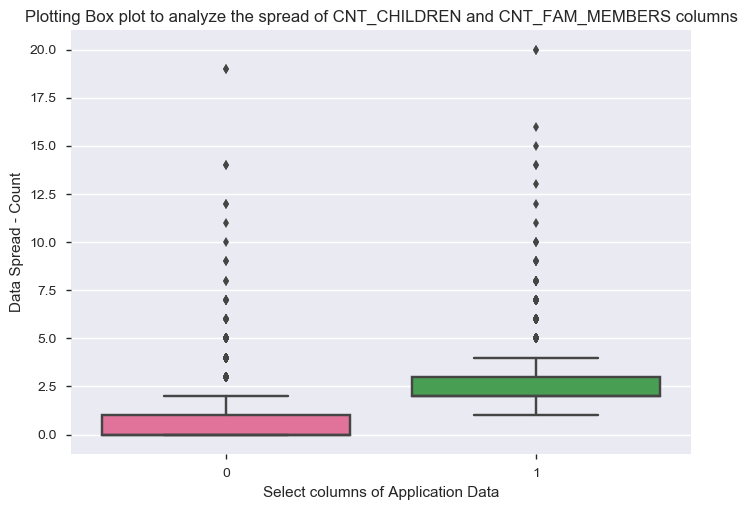

In [429]:
ax = sns.boxplot(data=[loan_appl['CNT_CHILDREN'],loan_appl['CNT_FAM_MEMBERS']],palette=[sns.xkcd_rgb["medium pink"], sns.xkcd_rgb["medium green"]])

#ax.set(yscale='log')
plt.xlabel('Select columns of Application Data')
plt.ylabel('Data Spread - Count')
plt.title('Plotting Box plot to analyze the spread of CNT_CHILDREN and CNT_FAM_MEMBERS columns')
plt.show()

### <font color=blue>**Inference on Outliers**</font>:  
#### From the above analysis it is clear that there are signifcant number of outliers towards the upper end for columns: CNT_CHILDREN,CNT_FAM_MEMBERS as well

In [430]:
# Analysing the CNT_CHILDREN outliers identified above to see if they are incorrect or could be possible

# Checking records with CNT_CHILDREN > 10

loan_appl.loc[loan_appl['CNT_CHILDREN'] >= 10,['CODE_GENDER','CNT_CHILDREN','CNT_FAM_MEMBERS','AGE_YEARS','NAME_FAMILY_STATUS','OCCUPATION_TYPE']]

CODE_GENDER  CNT_CHILDREN  CNT_FAM_MEMBERS  AGE_YEARS  \
34545            M            11             13.0      47.42   
80948            F            12             14.0      38.61   
132585           F            10             12.0      31.39   
155369           F            19             20.0      30.29   
171125           F            12             14.0      38.07   
176011           M            14             15.0      48.64   
265784           F            19             20.0      28.21   
267998           F            14             16.0      42.36   

          NAME_FAMILY_STATUS       OCCUPATION_TYPE  
34545                Married              Managers  
80948                Married            Core staff  
132585               Married            Core staff  
155369  Single / not married  Waiters/barmen staff  
171125               Married            Core staff  
176011             Separated               Drivers  
265784  Single / not married            Core staff  
267998               Married              Managers

### <font color=blue>**Inference on comparing Count of Children with Family related variables**</font>:  

> In most of the cases the CNT_FAM_MEMBERS is 2 greater than CNT_CHILDREN. Indicating [Married Couple + Children].
> In cases where CNT_FAM_MEMBERS is 1 greater than CNT_CHILDREN the NAME_FAMILY_STATUS is "Single"/"Separated"

> But when comparing AGE_YEARS with CNT_CHILDREN then there seems to be some discrepancy 
1. ID 155369 has 19 children at the age of ~30
2. ID 265784 has 19 children at the age of ~28

These two records seem incorrect, but may have to be re-verfied separately

In [431]:
#ax = sns.boxplot(data=[loan_appl['YEARS_EMPLOYED']],palette=[sns.xkcd_rgb["medium green"]])

#ax.set(yscale='log')
#plt.xlabel('YEARS_EMPLOYED')
#plt.ylabel('Data Spread - YEARS_EMPLOYED')
#plt.show()

# The Pandas Profiling results was earlier showing that YEARS_EMPLOYED column has a clear outlier with a huge value for number of days of employment

loan_appl['YEARS_EMPLOYED'].describe()

count    182638.000000
mean          6.691146
std           6.496088
min           0.000000
25%           2.180000
50%           4.640000
75%           8.920000
max          49.070000
Name: YEARS_EMPLOYED, dtype: float64

#### The above results now shows that those errorneous values must have got deleted when making the above data cleansing operations

In [432]:
loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    182638.000000
mean          1.424331
std           2.437566
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### The above result shows that OBS_30_CNT_SOCIAL_CIRCLE column has a clear outlier which needs to be deleted

In [433]:
loan_appl = loan_appl[loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'] != 348]

In [434]:
loan_appl['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    182637.000000
mean          1.422434
std           2.298714
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [435]:
# Similarly deleting an outlier in OBS_60_CNT_SOCIAL_CIRCLE column
loan_appl = loan_appl[loan_appl['OBS_60_CNT_SOCIAL_CIRCLE'] != 344]

In [436]:
loan_appl = loan_appl[loan_appl['AMT_REQ_CREDIT_BUREAU_QRT'] != 261]

In [437]:
loan_appl[loan_appl['NFLAG_MOBIL'] != 1]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, AGE_YEARS, YEARS_EMPLOYED, YEARS_REGISTRATION, YEARS_ID_PUBLISH, NFLAG_MOBIL, NFLAG_WORK_PHONE, NFLAG_HOME_PHONE, NFLAG_CONT_MOBILE, NFLAG_PHONE, NFLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, DAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, TOTALAREA_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

[0 rows x 73 columns]

#### Other Inferences on Outliers and Data Imbalances on modified data set:
- [Outliers] AMT_INCOME_TOTAL column has an outlier 117000000. But this could be expected as the person could be say owning a business.Also, it is just one row Therefore, not deleting this row

- [Data Imbalance] NFLAG_MOBIL has now only value 1. No value is 0

### <font color=blue>**Summary on - Missing Data, Outliers, Data Imbalances**</font>:  

- All the Missing Data has been removed or imputed as required
- Outliers which were not logical or way off were removed
- Outliers which seemed as could be possible have been retained and highlighted
- Data Imbalances have been observed from Pandas profiling and otherwise and have been highlighted above

- Also performed were the following
>1. Checks and corrections on Data Type Mismatch
>2. Treating invalid values
>3. Treating invalid column names
>4. Data Standardization
>5. Univariate and Bivariate analysis were applicable to study outliers and data imbalances
>6. Frequency plots were generated as part of the Pandas Profiling report
>7. Summary metrics of Continuous variables through Pandas profiling report
>8. Plotted Box plots on log scale to study outliers

- Deliverables created:
>1. Metadata Description File
>2. Cleansed Application Data File

### <font color=blue>**Univariate Analysis and Segmented Univariate Analysis**</font>:  

#### 1. Analyzing the count and % spread of clients across Occupation types

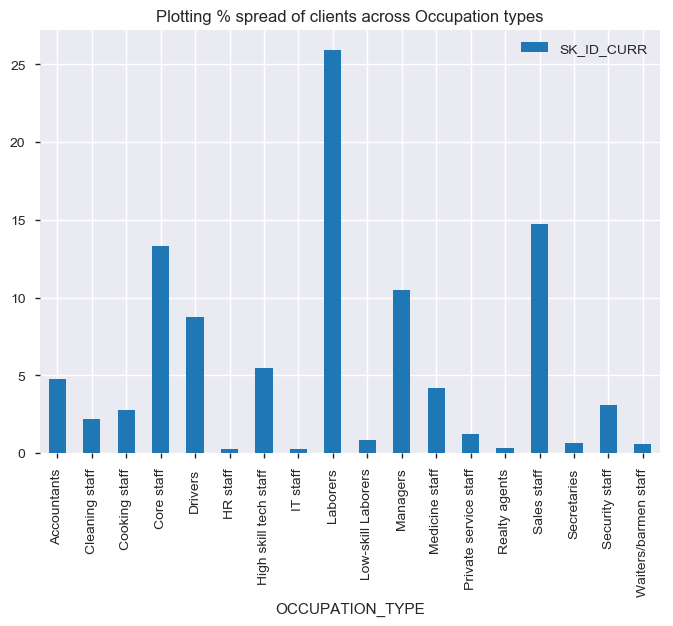

In [438]:
round((loan_appl.groupby('OCCUPATION_TYPE').SK_ID_CURR.count() / len(loan_appl))*100,2).plot.bar(legend=True)
plt.title("Plotting % spread of clients across Occupation types")
plt.show()

#### Key Inferences:
>1. Most of the clients belong to "Laborers, Sales Staff, Core Staff, Managers, Drivers" types which between them comprises of ~ >70% of the total size

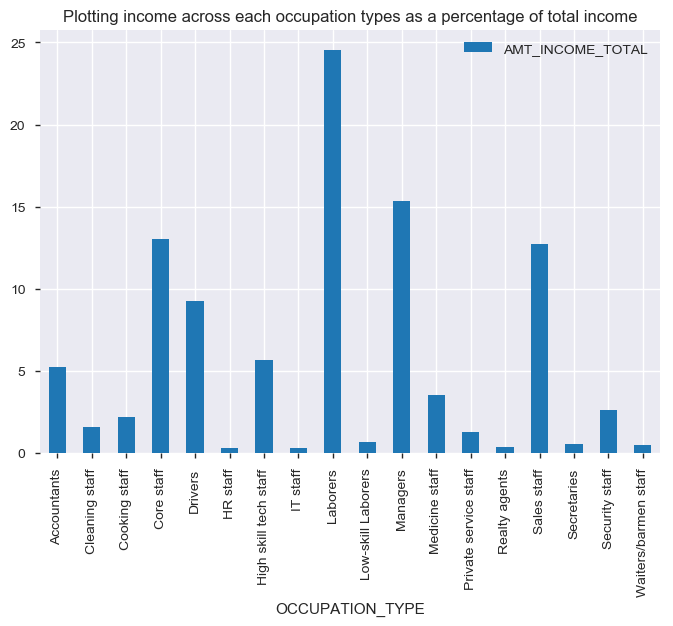

In [442]:
# Calculate the income across each occupation types as a percentage of total income

round((loan_appl.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.sum() / loan_appl['AMT_INCOME_TOTAL'].sum())*100,2).plot.bar(legend=True)
plt.title("Plotting income across each occupation types as a percentage of total income")
plt.show()

#### Key Infereneces: 
>1. Broadly the income spread is equivalent to the population spread
>2. Managers, High Tech Staff have higher salaries in the given sample because their % count is less but % share of total income is higher
>3. Sales Staff % count is way higher than their % share of the total income

#### 2.  Analyzing the % spread of Loan Credit across Gender

In [445]:
round((loan_appl.groupby('CODE_GENDER').AMT_CREDIT.sum() / loan_appl['AMT_CREDIT'].sum())*100,2)

CODE_GENDER
F    61.34
M    38.66
Name: AMT_CREDIT, dtype: float64

#### Key Infereneces: 
>1. Women have applied for more loan credit than men. Could be also because there are more Women in the sample than Men

#### 3.  Analyzing the % count Gender across different Education Types

In [446]:
count_gen = loan_appl.groupby(['CODE_GENDER','NAME_EDUCATION_TYPE']).SK_ID_CURR.count()

# Taking column wise % at level 0 i.e. at Gender level

round((count_gen/count_gen.groupby(level=0).sum())*100,2)

CODE_GENDER  NAME_EDUCATION_TYPE          
F            Academic degree                   0.05
             Higher education                 27.95
             Incomplete higher                 3.42
             Lower secondary                   0.69
             Secondary / secondary special    67.89
M            Academic degree                   0.05
             Higher education                 23.79
             Incomplete higher                 3.93
             Lower secondary                   1.17
             Secondary / secondary special    71.06
Name: SK_ID_CURR, dtype: float64

#### Key Infereneces: 
>1. There is a slightly higher % of Women completing Higher Education than Men
>2. There is a slightly higher % of Men completing Seconday Education than Women
>3. Overall the clients in the sample are not highly educated

#### 4.  Analyzing the % spread of Loan Credit across Gender and Education Type

In [448]:
round((loan_appl.groupby(['CODE_GENDER','NAME_EDUCATION_TYPE']).AMT_CREDIT.sum() / loan_appl['AMT_CREDIT'].sum())*100,2)

CODE_GENDER  NAME_EDUCATION_TYPE          
F            Academic degree                   0.04
             Higher education                 19.37
             Incomplete higher                 1.92
             Lower secondary                   0.37
             Secondary / secondary special    39.64
M            Academic degree                   0.02
             Higher education                 10.54
             Incomplete higher                 1.44
             Lower secondary                   0.39
             Secondary / secondary special    26.26
Name: AMT_CREDIT, dtype: float64

#### Key Infereneces: 
>1. Women have applied for more loan credit than men

#### 3.  Analyzing the % count Gender across different Occuptation Types

CODE_GENDER  OCCUPATION_TYPE      
F            Accountants               7.55
             Cleaning staff            3.28
             Cooking staff             4.10
             Core staff               17.10
             Drivers                   0.71
             HR staff                  0.41
             High skill tech staff     5.72
             IT staff                  0.13
             Laborers                 17.96
             Low-skill Laborers        0.24
             Managers                  9.27
             Medicine staff            6.65
             Private service staff     1.89
             Realty agents             0.51
             Sales staff              21.06
             Secretaries               0.97
             Security staff            1.57
             Waiters/barmen staff      0.87
M            Accountants               0.37
             Cleaning staff            0.37
             Cooking staff             0.67
             Core staff                7.

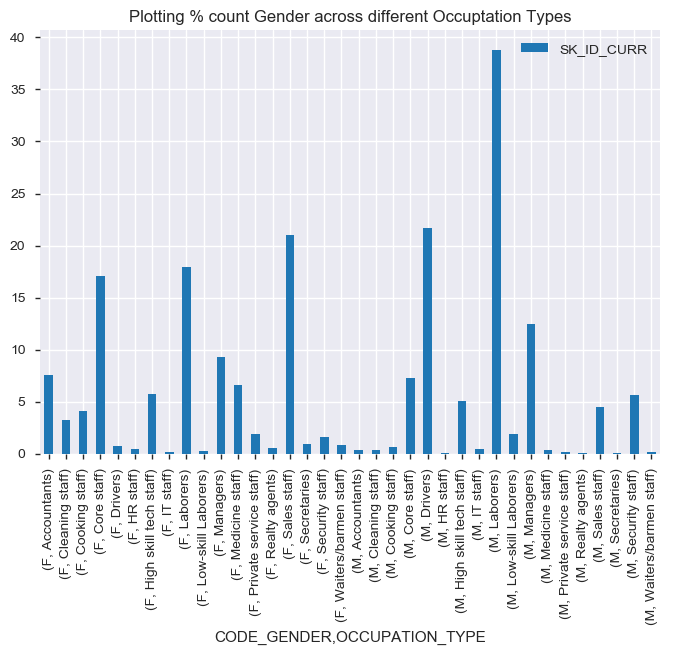

In [449]:
count_gen = loan_appl.groupby(['CODE_GENDER','OCCUPATION_TYPE']).SK_ID_CURR.count()

# Taking column wise % at level 0 i.e. at Gender level
print(round((count_gen/count_gen.groupby(level=0).sum())*100,2))
round((count_gen/count_gen.groupby(level=0).sum())*100,2).plot.bar(legend=True)
plt.title("Plotting % count Gender across different Occuptation Types")
plt.show()

#### Key Infereneces: 
>1. Women have general taken up jobs of - Sales staff, Laborers, Core staff, Managers, Accountants comprising of 75% of their total
>2. Men have general taken up jobs of - Laborers, Drivers, Managers, Core Staff, Security Staff etc.
>3. It could be easily seen that some jobs as Drivers, Security Staff are more common among Men than Women whereas Sales Staff, Accountants are more common among Women than Men
>4. Laborers, Managers, Core Staff are broadly common between both the genders

### <font color=blue>**Univariate Analysis - Binning of Continuous Variables**</font>:  

#### Binning of Age column

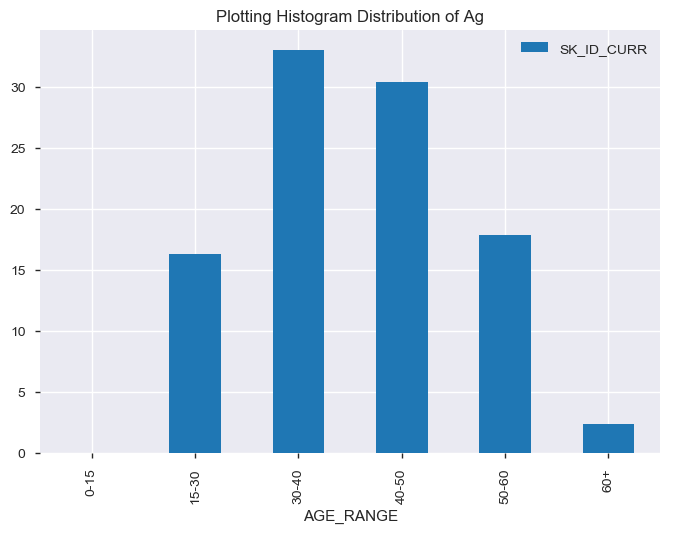

In [450]:
bins = [0, 15, 30, 40, 50, 60, 70]

names = ['0-15', '15-30', '30-40', '40-50', '50-60', '60+']

loan_appl['AGE_RANGE'] = pd.cut(loan_appl['AGE_YEARS'], bins, labels=names)

# Plotting % count of clients across age ranges

count = loan_appl.groupby('AGE_RANGE').agg({'SK_ID_CURR':'count'})
round((count*100 / len(loan_appl)),2).plot.bar(legend=True)
plt.title("Plotting Histogram Distribution of Ag")
plt.show()

#### Key Infereneces: 
>1. Most of the clients are in the Age Range of 30-40 followed by 40-50

#### Binning the Income Column: Removing the outliers as it has many as seen in the analysis above

In [451]:
identify_outlier(loan_appl,'AMT_INCOME_TOTAL')

0 number of AMT_INCOME_TOTAL column values less than inner limit
5665 number of AMT_INCOME_TOTAL column values more than outer limit




[  26550.   44910.   63270.   81630.   99990.  118350.  136710.  155070.
  173430.  191790.  210150.  228510.  246870.  265230.  283590.  301950.
  320310.  338670.  357030.  375390.]


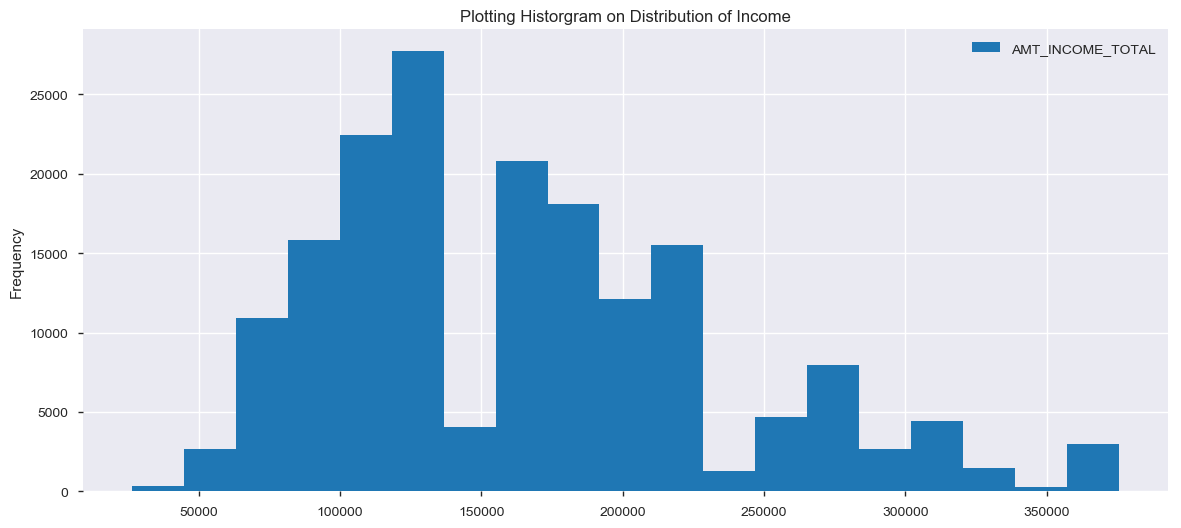

In [452]:
q1 = loan_appl['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = loan_appl['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3-q1 #Interquartile range
inner_fence_low  = q1-1.5*iqr
inner_fence_high = q3+1.5*iqr

if (inner_fence_low <0):
    bin_values = np.arange(start=loan_appl['AMT_INCOME_TOTAL'].min(), stop=inner_fence_high, step=(inner_fence_high-loan_appl['AMT_INCOME_TOTAL'].min())/20)
else:
    bin_values = np.arange(start=inner_fence_low, stop=inner_fence_high, step=(inner_fence_high-inner_fence_low)/20)
print(bin_values)
loan_appl['AMT_INCOME_TOTAL'].plot.hist(bins=bin_values, figsize=[14,6],legend=True)
plt.title("Plotting Historgram on Distribution of Income")
plt.show()

#### Key Infereneces: 
>1. Most of the clients are in the Income range - [1,18,350 to 1,36,710]
>2. But as shown above there are 5665 number of outliers as well

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


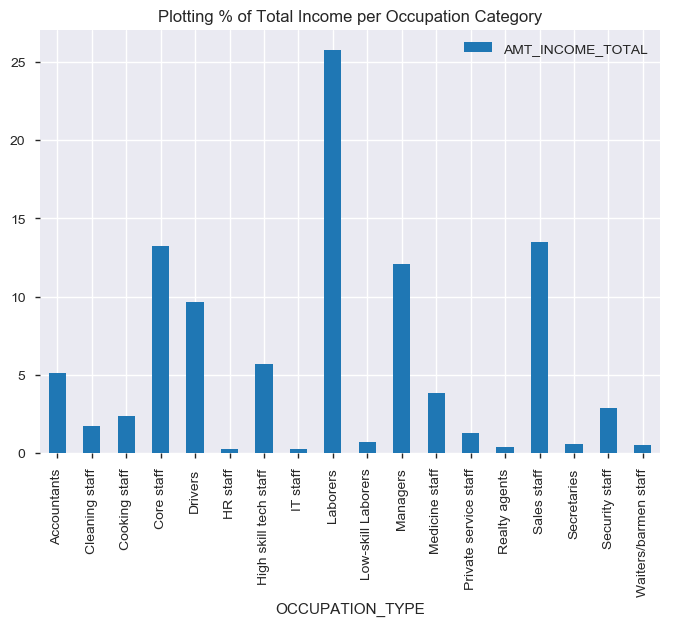

In [453]:
names = ['0-26550', '26550-44910', '44910-63270', '63270-81630', '81630-99990', '99990-118350',
        '118350-136710', '136710-155070', '155070-173430', '173430-191790', '191790-210150',
         '210150-228510', '228510-246870', '246870-265230', '265230-283590', '283590-301950',
        '301950-320310', '320310-338670', '338670-357030']

# Removing outliers
temp_df = loan_appl[(loan_appl['AMT_INCOME_TOTAL'] <= inner_fence_high)]

temp_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(temp_df['AMT_INCOME_TOTAL'], bin_values, labels=names)

# Plotting % sum of total income across occupation type

sum = temp_df.groupby('OCCUPATION_TYPE').agg({'AMT_INCOME_TOTAL':'sum'})
round((sum*100 / (temp_df['AMT_INCOME_TOTAL'].sum())),2).plot.bar(legend=True)
plt.title("Plotting % of Total Income per Occupation Category")
plt.show()

In [454]:
# Check Point 3
# Saving the data sets at end of Check Point 3. This to do some further analysis on the data sets in tabular / excel format

loan_appl.to_csv('loan_appl_checkpoint_3.csv')
metadata_df_appl.to_csv('metadata_df_appl_checkpoint_3.csv')

### <font color=blue>**Dividing the Dataset into two. With Target Variable 0 and with Target Variable 1**</font>:  

In [455]:
loan_appl_0_target_df = loan_appl[loan_appl['TARGET'] == 0]
loan_appl_1_target_df = loan_appl[loan_appl['TARGET'] == 1]

In [456]:
# Writing both the sub-sets into a file
loan_appl_0_target_df.to_csv('loan_appl_0_target.csv')
loan_appl_1_target_df.to_csv('loan_appl_1_target.csv')

In [457]:
print(loan_appl_0_target_df.shape)
print(loan_appl_1_target_df.shape)

(167295, 74)
(15341, 74)


## <font color=blue>**Univariate Analysis on both the Target Variables 0 and 1**</font>:  

### <font color=blue>**Pandas Profiling of Target Variable 1 Dataset**</font>:  

In [458]:
pandas_profiling.ProfileReport(loan_appl_1_target_df)

### <font color=blue>**Pandas Profiling of Target variable 0 Dataset**</font>:  

In [459]:
pandas_profiling.ProfileReport(loan_appl_0_target_df)

### <font color=blue>**Manual Profiling of Target variable 1 and 0 Dataset**</font>:  

### <font color=blue>**Manual Profiling - Credit Amount**</font>:  

In [517]:
# Credit Amount Analysis between the two Target Data Drames
print(loan_appl_0_target_df['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f')))
print(loan_appl_1_target_df['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f')))

count     167295.000000
mean      623916.221833
std       413520.906811
min        45000.000000
25%       284256.000000
50%       531706.500000
75%       848745.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object
count      15341.000000
mean      567165.411740
std       347431.627033
min        45000.000000
25%       294322.500000
50%       505642.500000
75%       746280.000000
max      3020760.000000
Name: AMT_CREDIT, dtype: object


[   45000.      127523.925   210047.85    292571.775   375095.7
   457619.625   540143.55    622667.475   705191.4     787715.325
   870239.25    952763.175  1035287.1    1117811.025  1200334.95
  1282858.875  1365382.8    1447906.725  1530430.65   1612954.575]


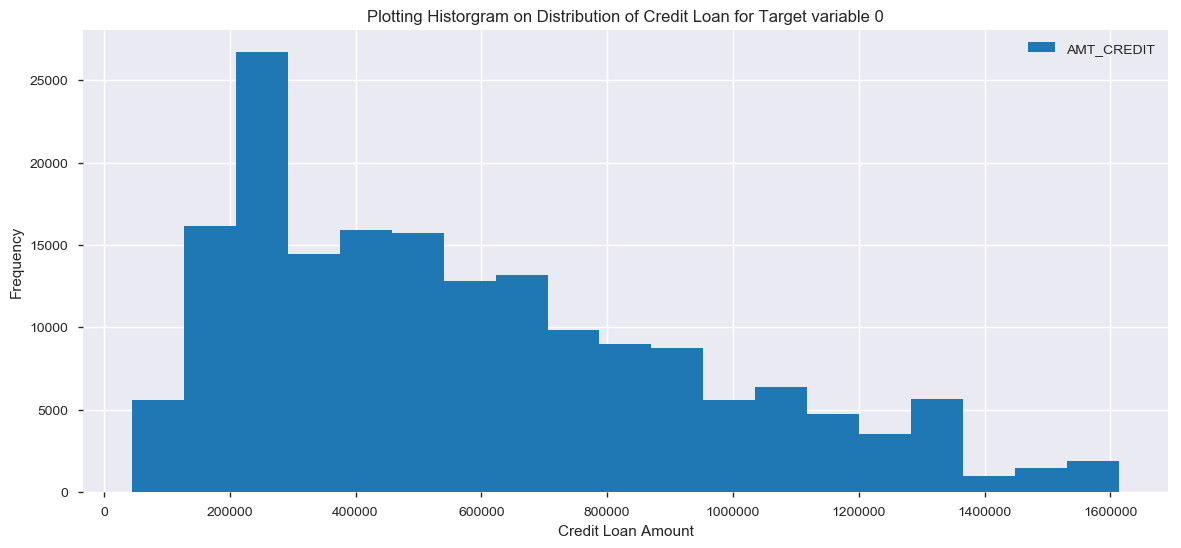

In [469]:
# Distribution of Credit Loan for Target variable 0

q1 = loan_appl_0_target_df['AMT_CREDIT'].quantile(0.25)
q3 = loan_appl_0_target_df['AMT_CREDIT'].quantile(0.75)
iqr = q3-q1 #Interquartile range
inner_fence_low  = q1-1.5*iqr
inner_fence_high = q3+1.5*iqr

if (inner_fence_low <0):
    bin_values = np.arange(start=loan_appl_0_target_df['AMT_CREDIT'].min(), stop=inner_fence_high, step=(inner_fence_high-loan_appl_0_target_df['AMT_CREDIT'].min())/20)
else:
    bin_values = np.arange(start=inner_fence_low, stop=inner_fence_high, step=(inner_fence_high-inner_fence_low)/20)
print(bin_values)
loan_appl['AMT_CREDIT'].plot.hist(bins=bin_values, figsize=[14,6],legend=True)
plt.xlabel('Credit Loan Amount')
plt.title("Plotting Historgram on Distribution of Credit Loan for Target variable 0")
plt.show()

[   45000.       113960.8125   182921.625    251882.4375   320843.25
   389804.0625   458764.875    527725.6875   596686.5      665647.3125
   734608.125    803568.9375   872529.75     941490.5625  1010451.375
  1079412.1875  1148373.      1217333.8125  1286294.625   1355255.4375]


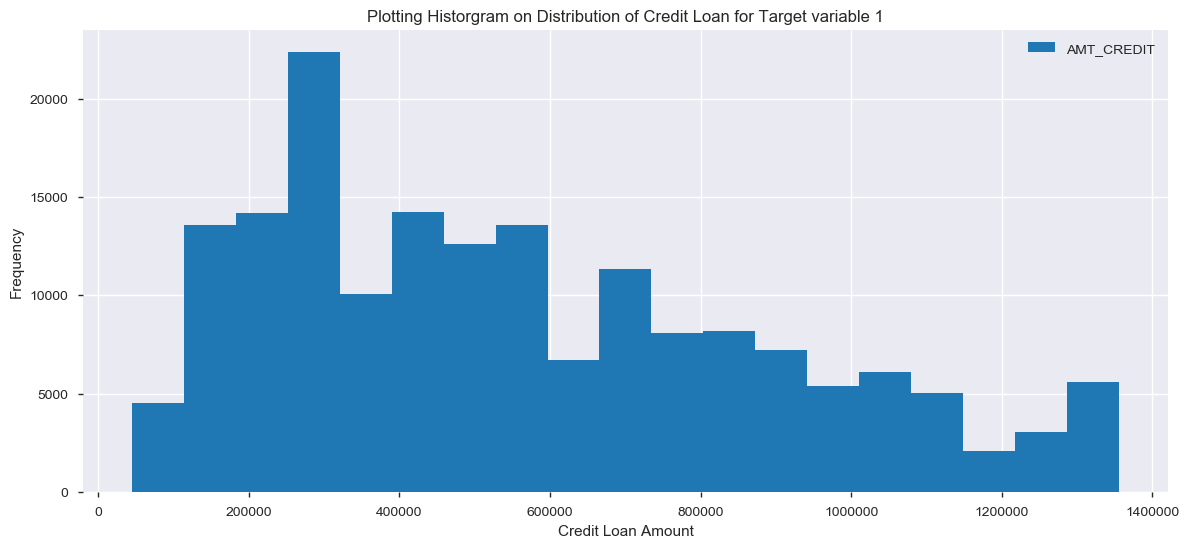

In [468]:
# Distribution of Credit Loan for Target variable 1

q1 = loan_appl_1_target_df['AMT_CREDIT'].quantile(0.25)
q3 = loan_appl_1_target_df['AMT_CREDIT'].quantile(0.75)
iqr = q3-q1 #Interquartile range
inner_fence_low  = q1-1.5*iqr
inner_fence_high = q3+1.5*iqr

if (inner_fence_low <0):
    bin_values = np.arange(start=loan_appl_1_target_df['AMT_CREDIT'].min(), stop=inner_fence_high, step=(inner_fence_high-loan_appl_1_target_df['AMT_CREDIT'].min())/20)
else:
    bin_values = np.arange(start=inner_fence_low, stop=inner_fence_high, step=(inner_fence_high-inner_fence_low)/20)
print(bin_values)
loan_appl['AMT_CREDIT'].plot.hist(bins=bin_values, figsize=[14,6],legend=True)
plt.xlabel('Credit Loan Amount')
plt.title("Plotting Historgram on Distribution of Credit Loan for Target variable 1")
plt.show()

### <font color=blue>**Manual Profiling - Education Type - Comparing Target Variable 0 and 1**</font>:  

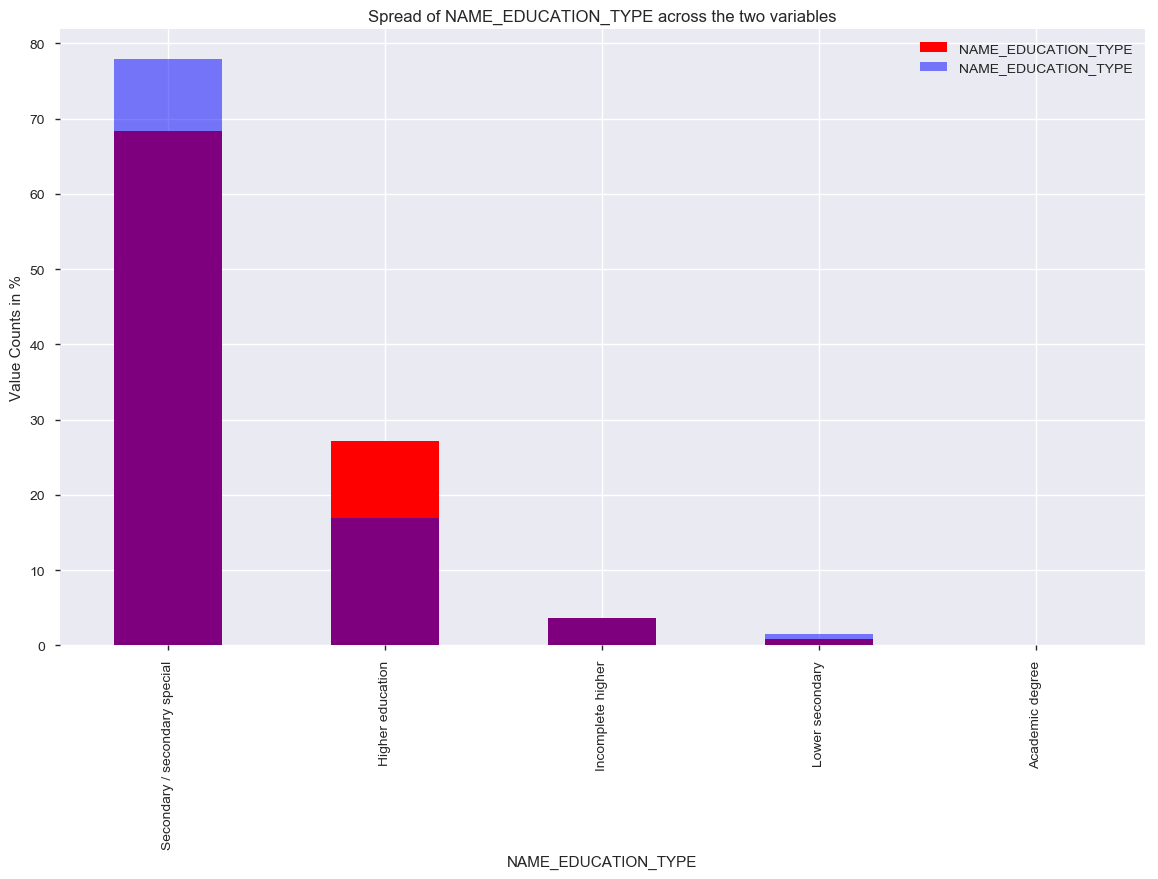

In [516]:
org_0 = loan_appl_0_target_df['NAME_EDUCATION_TYPE'].value_counts()*100/len(loan_appl_0_target_df['NAME_EDUCATION_TYPE'])
org_1 = loan_appl_1_target_df['NAME_EDUCATION_TYPE'].value_counts()*100/len(loan_appl_1_target_df['NAME_EDUCATION_TYPE'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of NAME_EDUCATION_TYPE across the two variables')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Value Counts in %')
plt.show()

### <font color=blue>**Manual Profiling - Occupation Type - Comparing Target Variable 0 and 1**</font>:  

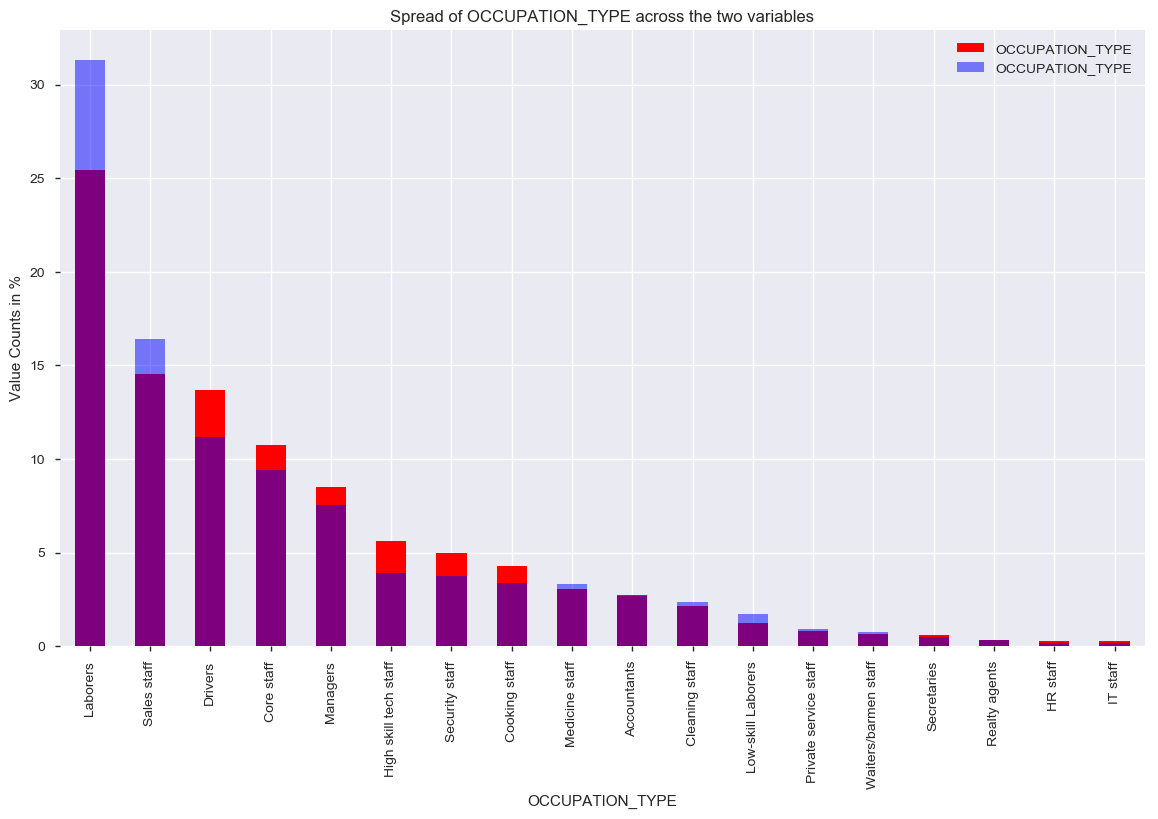

In [515]:
org_0 = loan_appl_0_target_df['OCCUPATION_TYPE'].value_counts()*100/len(loan_appl_0_target_df['OCCUPATION_TYPE'])
org_1 = loan_appl_1_target_df['OCCUPATION_TYPE'].value_counts()*100/len(loan_appl_1_target_df['OCCUPATION_TYPE'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of OCCUPATION_TYPE across the two variables')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Value Counts in %')
plt.show()

### <font color=blue>**Manual Profiling - Gender - Comparing Target Variable 0 and 1**</font>:  

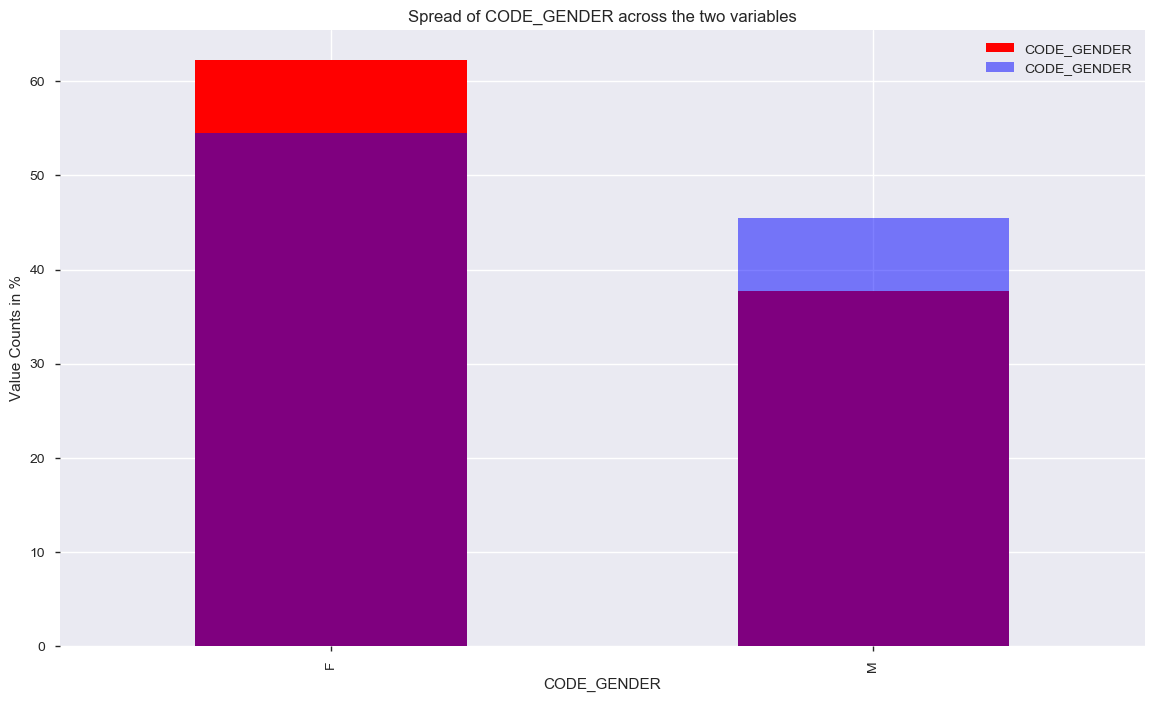

In [514]:
org_0 = loan_appl_0_target_df['CODE_GENDER'].value_counts()*100/len(loan_appl_0_target_df['CODE_GENDER'])
org_1 = loan_appl_1_target_df['CODE_GENDER'].value_counts()*100/len(loan_appl_1_target_df['CODE_GENDER'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of CODE_GENDER across the two variables')
plt.xlabel('CODE_GENDER')
plt.ylabel('Value Counts in %')
plt.show()

### <font color=blue>**Manual Profiling - Family Status - Comparing Target Variable 0 and 1**</font>:  

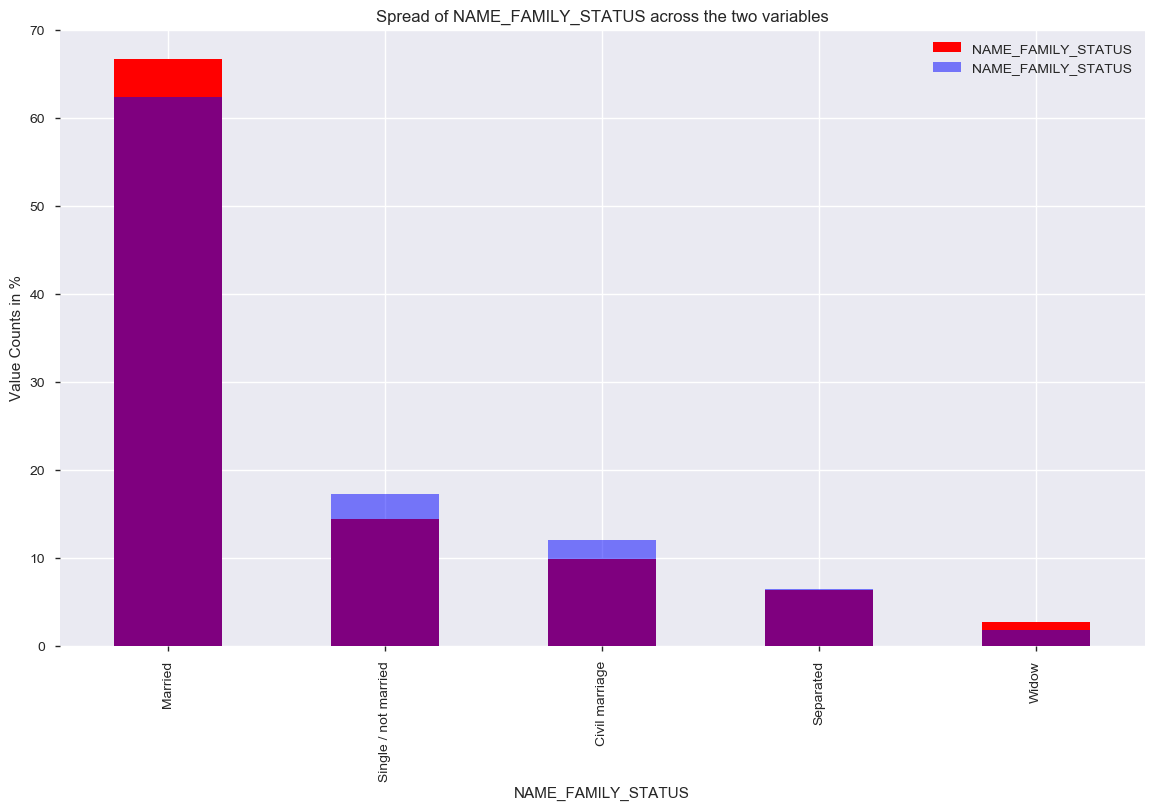

In [513]:
org_0 = loan_appl_0_target_df['NAME_FAMILY_STATUS'].value_counts()*100/len(loan_appl_0_target_df['NAME_FAMILY_STATUS'])
org_1 = loan_appl_1_target_df['NAME_FAMILY_STATUS'].value_counts()*100/len(loan_appl_1_target_df['NAME_FAMILY_STATUS'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of NAME_FAMILY_STATUS across the two variables')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Value Counts in %')
plt.show()

### <font color=blue>**Manual Profiling - Count of Children - Comparing Target Variable 0 and 1**</font>:  

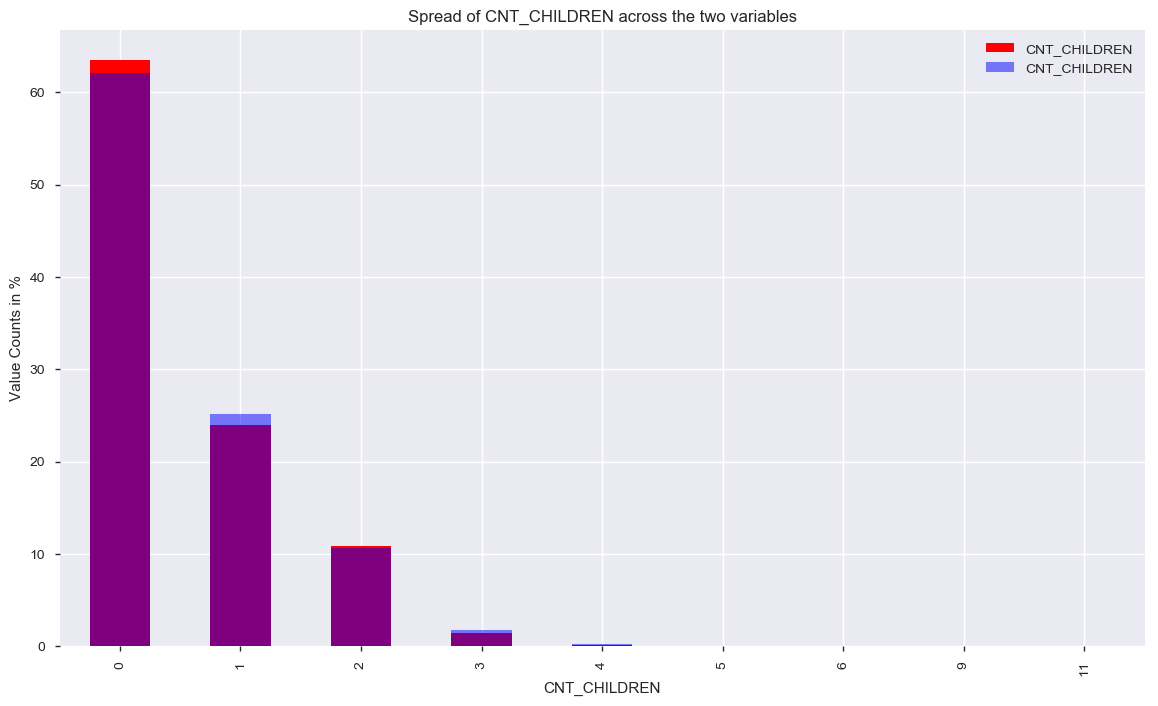

In [512]:
org_0 = loan_appl_0_target_df['CNT_CHILDREN'].value_counts()*100/len(loan_appl_0_target_df['CNT_CHILDREN'])
org_1 = loan_appl_1_target_df['CNT_CHILDREN'].value_counts()*100/len(loan_appl_1_target_df['CNT_CHILDREN'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of CNT_CHILDREN across the two variables')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Value Counts in %')
plt.show()

### <font color=blue>**Manual Profiling - Housing Type - Comparing Target Variable 0 and 1**</font>:  

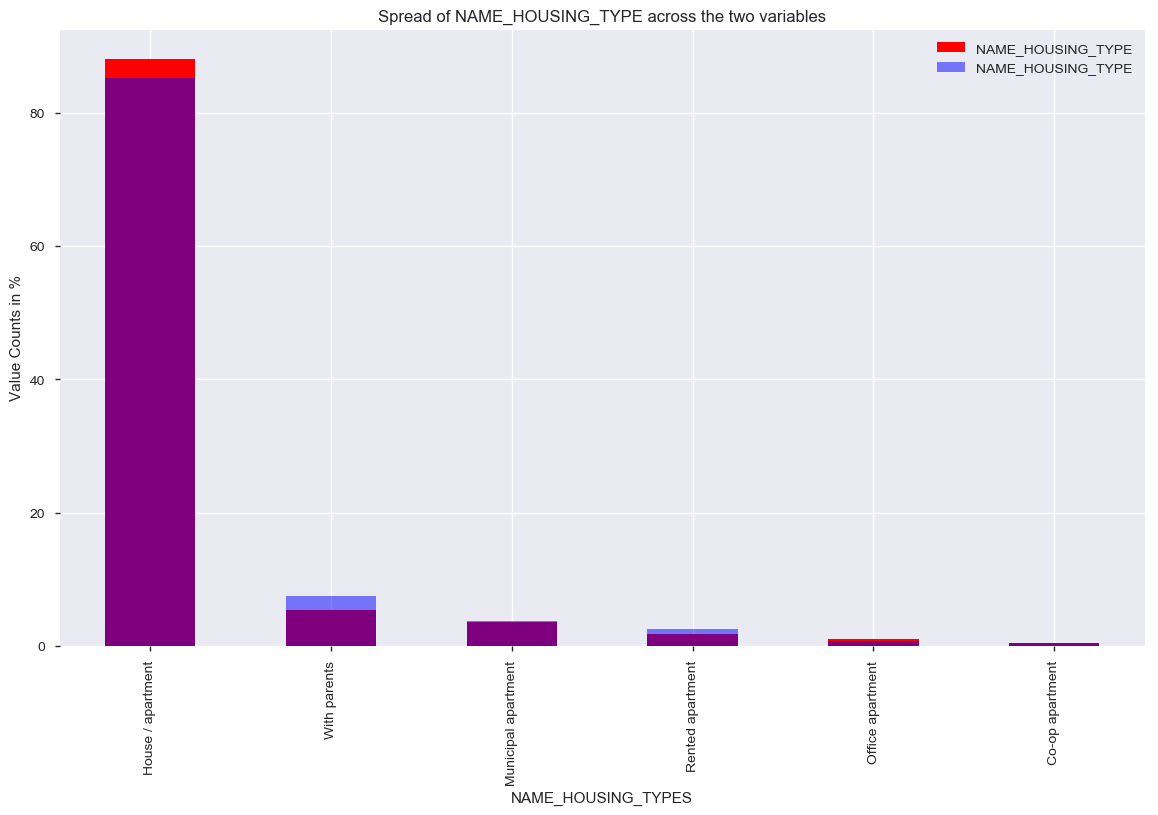

In [511]:
org_0 = loan_appl_0_target_df['NAME_HOUSING_TYPE'].value_counts()*100/len(loan_appl_0_target_df['NAME_HOUSING_TYPE'])
org_1 = loan_appl_1_target_df['NAME_HOUSING_TYPE'].value_counts()*100/len(loan_appl_1_target_df['NAME_HOUSING_TYPE'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of NAME_HOUSING_TYPE across the two variables')
plt.xlabel('NAME_HOUSING_TYPES')
plt.ylabel('Value Counts in %')
plt.show()

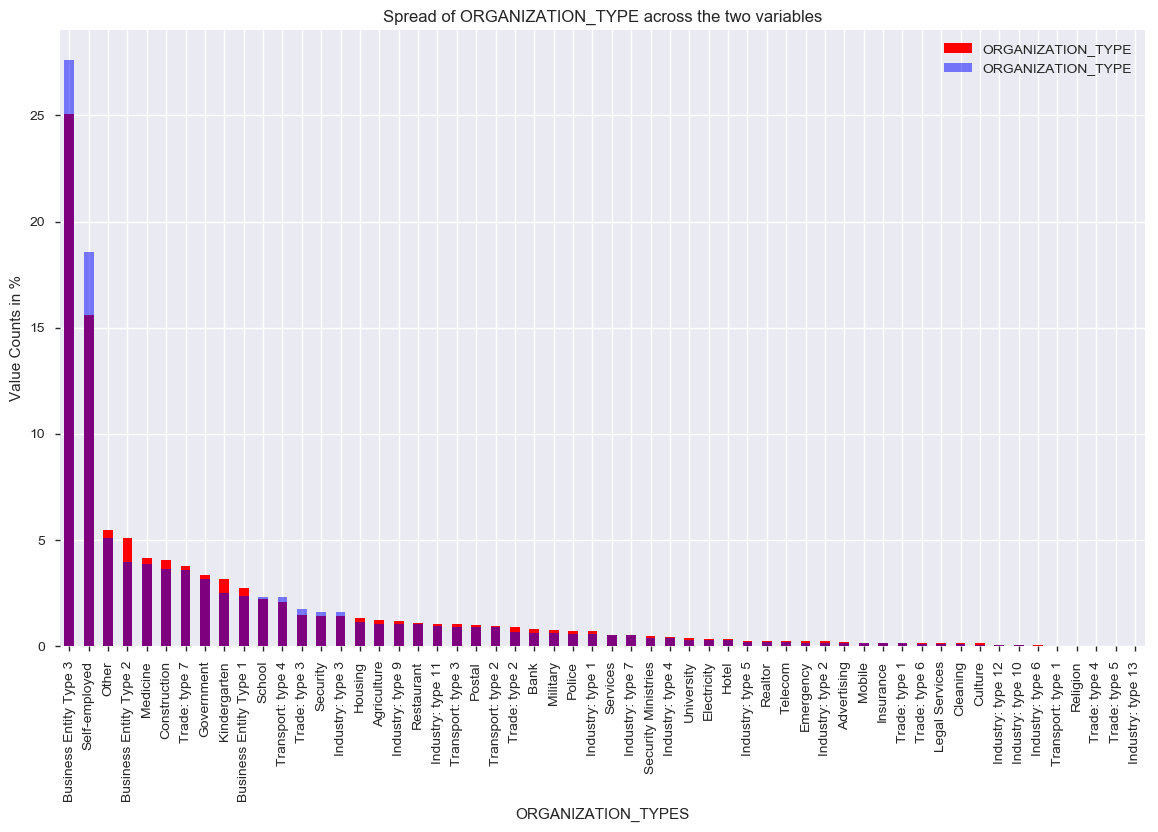

In [507]:
org_0 = loan_appl_0_target_df['ORGANIZATION_TYPE'].value_counts()*100/len(loan_appl_0_target_df['ORGANIZATION_TYPE'])
org_1 = loan_appl_1_target_df['ORGANIZATION_TYPE'].value_counts()*100/len(loan_appl_1_target_df['ORGANIZATION_TYPE'])
plt.figure(figsize = (14,8))
org_0.plot(kind='bar',color='red',legend=True)
org_1.plot(kind='bar',alpha=0.5,color='blue',legend=True)
plt.title('Spread of ORGANIZATION_TYPE across the two variables')
plt.xlabel('ORGANIZATION_TYPES')
plt.ylabel('Value Counts in %')
plt.show()

#### Key Inferences from Pandas Profiling and Manual Profiling for Target Variable 1 and Target Variable Dataset

>1. [Age] The % of clients in Age Group 30-40 is higher for Target variable 1 than for Target variable 0.
>> This implies that the % of client facing payment difficulties is more in the age group of 30-40

>2. [Credit Loan] The metrics of Target variable 1 are slightly lower than Target variable 0
>> The distribution is almost similar for both the Target variables

>3. [Education] Clients not facing payment difficulties typically had greater % of higher education (27%) than those who did (16%). Whereas clients facing payment difficulties had greater % of secondary education (77.9%) than those who didnt (68%)
>> Better the education lesser the probability of facing payment difficulties

>4. [Occupation Type] No major trend here the distribution for both the Target variables looks fairly similar

>5. [Gender] The % of Men for Target variable 1 is greater than for Target variable 0. 
>> This could imply more men face payment difficulties than women in general

>6. [FAMILY_STATUS] % of clients being single / unmarried or with civil marriage is slightly higher for target variable 1 than 0
>> This could imply that clients who are single or with civil marriage are more likely to face payment difficulties

>7. [Count of Children] No major difference between distribution for both the variables

>8. [HOUSING TYPE] Key insights as follows
>> Those staying with Parents or in Rented Appartments as slightly more likely to face payment difficulties
>> Those staying in House/Appartment are slightly less likely to face payment difficulties

>9. [Organization Type] Key insights as follow
>> Clients in "Business Entity Type 3" and "Self Employed" organization types are more likely to face payment difficulties

### <font color=blue>**Target Variable 1 - Plotting Correlation Matrix**</font>:  

In [240]:
plt.figure(figsize=(50, 50))
corr = loan_appl_1_target_df.corr()
#corr.style.background_gradient(cmap='coolwarm')
sns_plot = sns.heatmap(corr, cmap="YlGnBu", annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns_plot.figure.savefig("output.png")

#### Above a correlation matrix has been plotted for subset with Target value = 1.
#### Here all the columns have been plotted for initial analysis. As there are a lot of columns the output is large and has been exported to a file

#### Key inferences from the plot
>1. Following columns can be dropped for further correlation analysis as they are categorical variables and have the same value for all or almost all the rows: 'TARGET', 'NFLAG_MOBIL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_17'

>2. There is very low correlation between the following columns and other columns or within these columns as well. The correlation values are between -0.2 and +0.2. Therefore, the following can be ignored for further correlation analysis:[DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2,	FLAG_DOCUMENT_3,	FLAG_DOCUMENT_4,	FLAG_DOCUMENT_5,	FLAG_DOCUMENT_6,	FLAG_DOCUMENT_7,	FLAG_DOCUMENT_8,	FLAG_DOCUMENT_9,	FLAG_DOCUMENT_10,	FLAG_DOCUMENT_11,	FLAG_DOCUMENT_12,	FLAG_DOCUMENT_13,	FLAG_DOCUMENT_14,	FLAG_DOCUMENT_15,	FLAG_DOCUMENT_16,	FLAG_DOCUMENT_17,	FLAG_DOCUMENT_18,	FLAG_DOCUMENT_19,	FLAG_DOCUMENT_20,	FLAG_DOCUMENT_21,	AMT_REQ_CREDIT_BUREAU_HOUR,	AMT_REQ_CREDIT_BUREAU_DAY,	AMT_REQ_CREDIT_BUREAU_WEEK,	AMT_REQ_CREDIT_BUREAU_MON,	AMT_REQ_CREDIT_BUREAU_QRT,	AMT_REQ_CREDIT_BUREAU_YEAR, NFLAG_MOBIL,	NFLAG_WORK_PHONE,	NFLAG_HOME_PHONE,	NFLAG_CONT_MOBILE,	NFLAG_PHONE	NFLAG_EMAIL, EXT_SOURCE_2, TOTALAREA_MODE, YEARS_ID_PUBLISH]. Also, removing further redundant columns for correlation analysis: SK_ID_CURR 

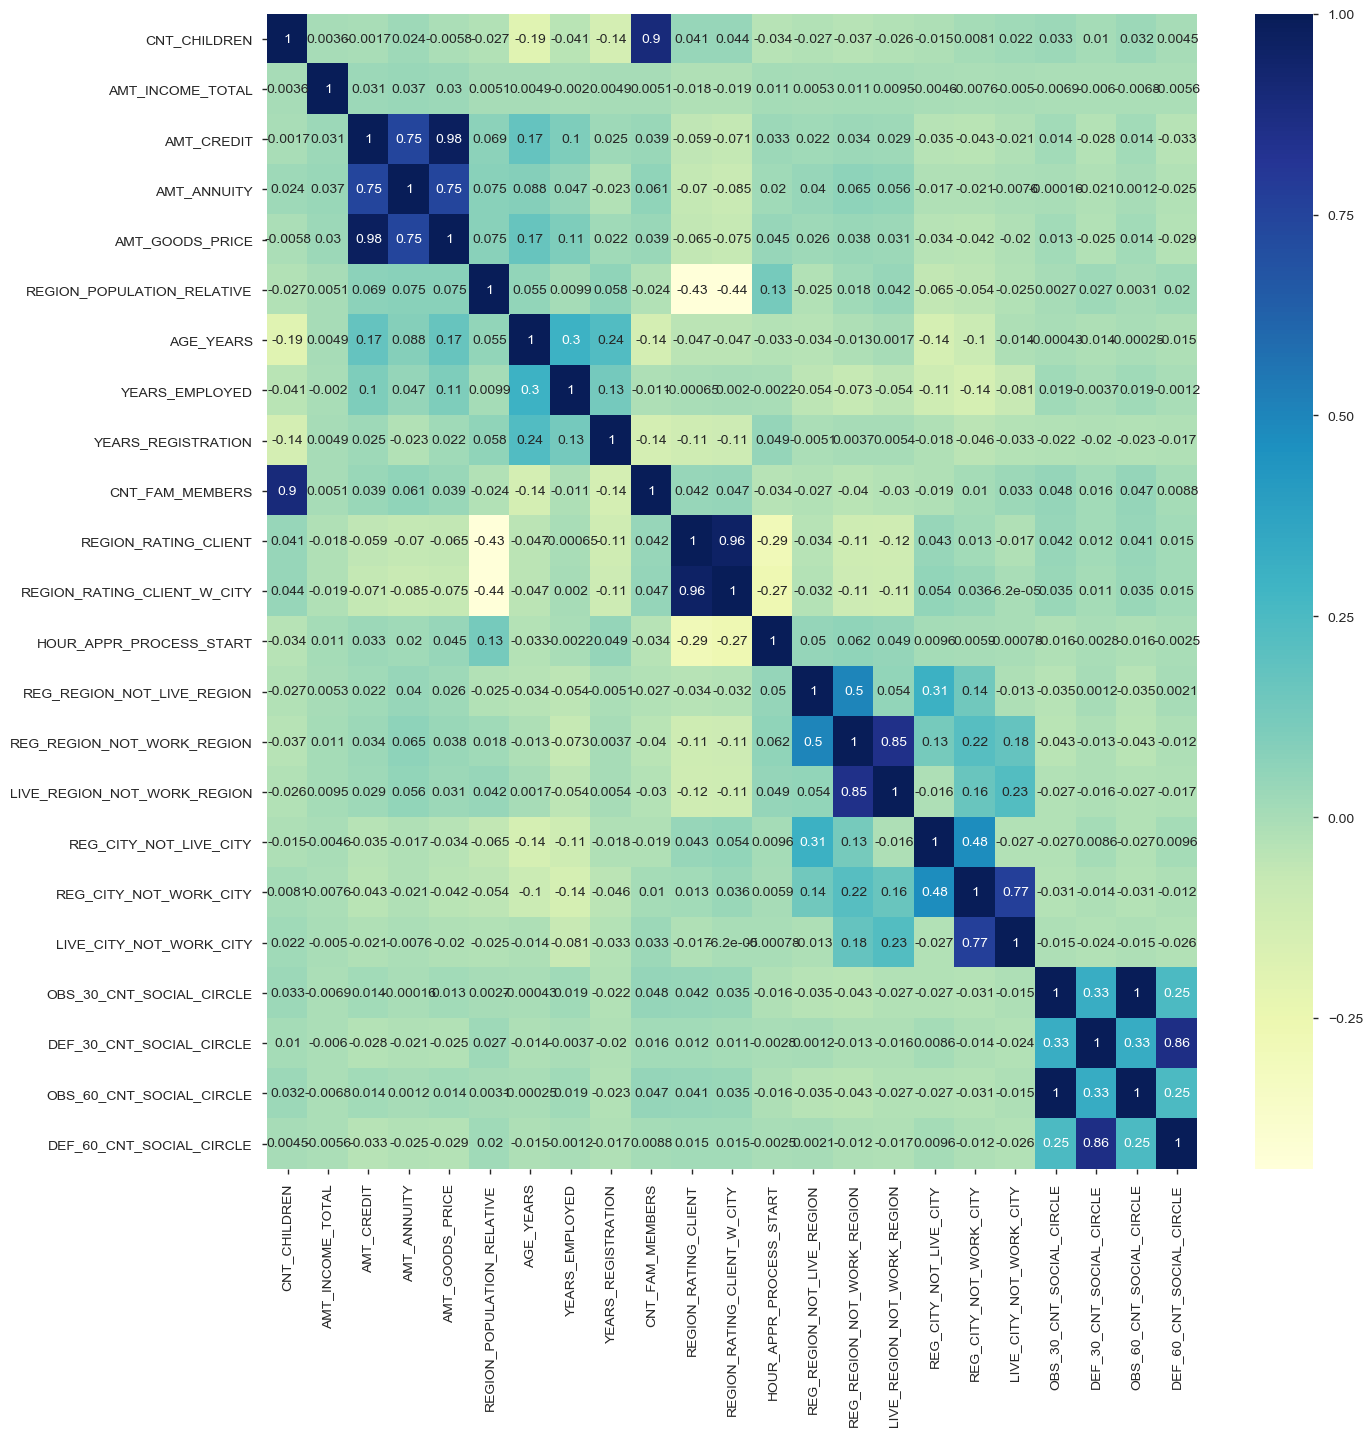

In [248]:
drop_list = ['TARGET', 'NFLAG_MOBIL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_17',
             'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
             'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
             'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
             'NFLAG_MOBIL', 'NFLAG_WORK_PHONE', 'NFLAG_HOME_PHONE', 'NFLAG_CONT_MOBILE', 'NFLAG_PHONE', 'NFLAG_EMAIL', 'EXT_SOURCE_2', 
             'TOTALAREA_MODE', 'YEARS_ID_PUBLISH','SK_ID_CURR']
plt.figure(figsize=(15, 15))
corr = loan_appl_1_target_df.drop(axis=1,labels=drop_list).corr()
#corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, cmap="YlGnBu", annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
#sns_plot.figure.savefig("output.png")

### Key Observations from the above Correlation Matrix for Target Variable 1

> ### Top 10 Correlations
>>1. AMT_CREDIT and AMT_GOODS_PRICE [0.98]
>>2. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY [0.96]
>>3. CNT_CHILDREN and CNT_FAM_MEMBERS [0.9]
>>4. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE [0.86]
>>5. REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION [0.85]
>>6. REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY [0.77]
>>7. AMT_CREDIT and AMT_ANNUITY [0.75]
>>8. AMT_ANNUITY and AMT_GOODS_PRICE [0.75]
>>9. FLAG_DOCUMENT_3 and FLAG_DOCUMENT_8 [-0.66]
>>10. REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_LIVE_REGION [0.5]

> ### Cluster #1: [Defaulted Observations and Actual Count]: 
The columns representating observations on how many of client's social surroundings had observable / or had defaulted in 30 DPD or 60 DPD 
>>1. These 4 columns are postively correlated to each other
>>2. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are fully and strongly correlated. This could imply the following:
>>> 1. As the count of observations for 30 DPD increase the count of observations for 60 DPD also increase
>>> 2. Expected because OBS_30_CNT_SOCIAL_CIRCLE in a way is a subset of OBS_60_CNT_SOCIAL_CIRCLE
>>> 3. Only either of them is required to be used for further analysis
>>3. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are fairly strongly and positively correlated
>> With the above we could infer that the observable values are strongly correlated but the actual values are not that much. This proves that either the real 30 DPD defaults extending upto 60 DPD are not accurately recorded, or there is some bias in observing and noting the observations. This may have to be further investigated

> ### Cluster #2: [Client's Permanent Address vs. Contact Address vs. Work Address]: 
Following columns [REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY] seem to form a cluster with following possible inferences

>>1. Flags on client's permanent address does not match work address (REG_CITY_NOT_WORK_CITY) and client's contact address does not match work address (LIVE_CITY_NOT_WORK_CITY) are fairly highly correlated. Implying following possibilities
>>>1. Permanent Address NOT EQUAL to Work Address NOT EQUAL to Contact Address. (Permanent Address = Contact Address is a possibility)
>>>2. Permanent Address IS EQUAL to WORK ADDRESS IS EQUAL to Contact Address. (All 3 are same)

>>2. Similar to above at region level REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION are strongly correlated
>>> As City is a subset of region this finding could be understood given the above finding

>>3. From the univariate analysis above it could be seen that most of these flags are set to value 0 i.e. they live in the same region and city and all 3 addresses could be the same. This could imply that they could be contract workers typically living in areas very close to their work area or people running self business from their homes. Again from the univarite analysis above we could draw the conclusion that could be contract workers/laborers/wage workers

> ### Cluster #3: [Loan Dispensing Agency's rating of Region and of Region with city considered]: 
Following columns [REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY] seem to form a cluster with following possible inferences

>>1. REGION_RATING_CLIENT_W_CITY or REGION_RATING_CLIENT seems to be a subset of the other. Therefore, given the high correlation only one variable can be used for further analysis

> ### Cluster #4: [Count of Family Members and Children]: 
Following columns [CNT_FAM_MEMBERS and CNT_CHILDREN] are very strongly correlated. This is expected as seen in the analysis done above while checking for outliers.

> ### Cluster #5: [Population of the Region where the client lives is negatively correlated with the Rating of the Region]: 
The more the population of the region, lesser the rating of the Region and vice-versa.

>>1. This could imply that typically the surrounding population of the client's region is not that good if they are living in a densely populated region. One such possibility is living in slums in which case the rating is given low.
>>2. However, this depends on the assumption that higher the score better the rating. If the inverse is True i.e. if Rating 1 is the best, then the above inference will not hold good and it will mean that those staying in less populated areas (could be far away from the city) will have lower rating  

> ### Cluster #6: [Amount of Credit, Loan Annuity and Amount of Good Price]
Following columns [AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE] are strongly correlated

>>1. This is expected because more the credit raised via loan more will be the annuity and the price of the goods for which the loan is raised and vice versa

### <font color=blue>**Target Variable 0 - Plotting Correlation Matrix**</font>:  

In [364]:
plt.figure(figsize=(50, 50))
corr = loan_appl_0_target_df.corr()
#corr.style.background_gradient(cmap='coolwarm')
sns_plot = sns.heatmap(corr, cmap="YlGnBu", annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns_plot.figure.savefig("output_for0.png")

In [ ]:
In Target 0
- Bit higher negative correlation between Document 3 and 8

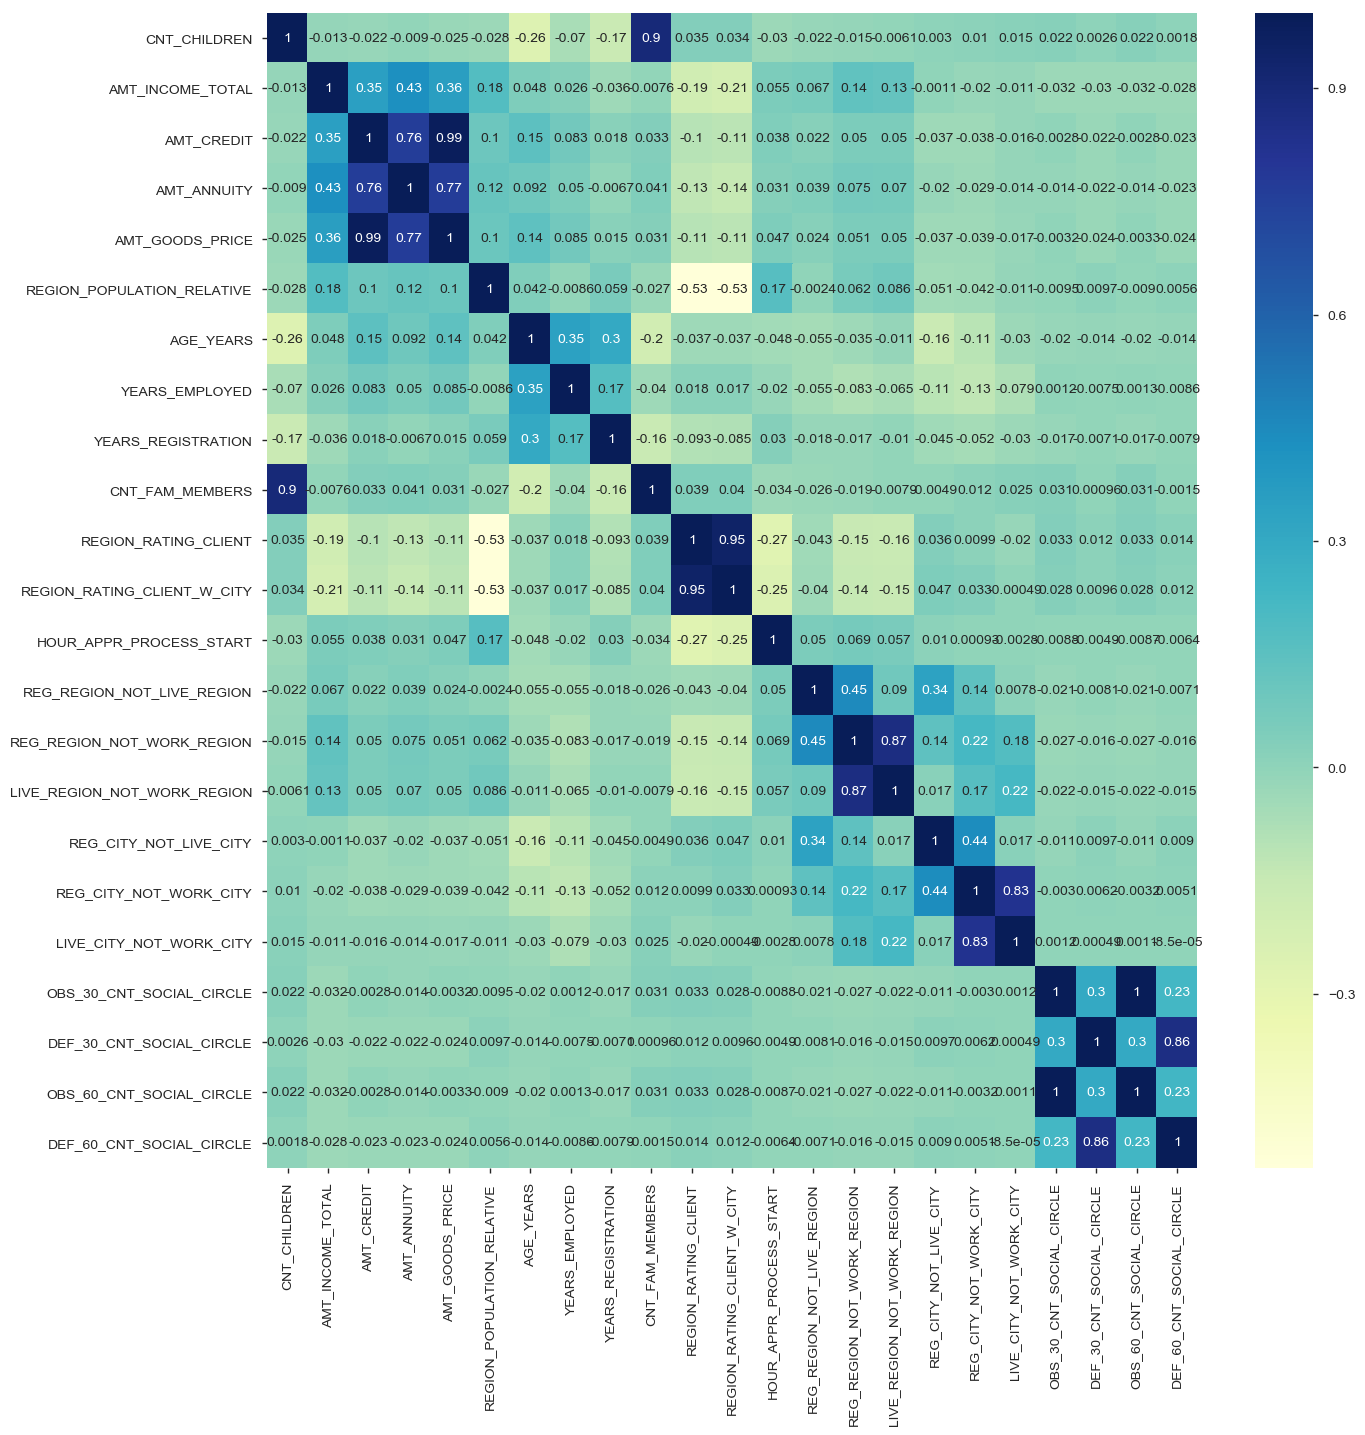

In [366]:
drop_list = ['TARGET', 'NFLAG_MOBIL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_17',
             'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
             'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
             'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
             'NFLAG_MOBIL', 'NFLAG_WORK_PHONE', 'NFLAG_HOME_PHONE', 'NFLAG_CONT_MOBILE', 'NFLAG_PHONE', 'NFLAG_EMAIL', 'EXT_SOURCE_2', 
             'TOTALAREA_MODE', 'YEARS_ID_PUBLISH','SK_ID_CURR']
plt.figure(figsize=(15, 15))
corr = loan_appl_0_target_df.drop(axis=1,labels=drop_list).corr()
#corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, cmap="YlGnBu", annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

> ### Top 10 Correlations
>>1. AMT_CREDIT and AMT_GOODS_PRICE [0.99]
>>2. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY [0.95]
>>3. CNT_CHILDREN and CNT_FAM_MEMBERS [0.9]
>>4. REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION [0.87]
>>5. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE [0.86]
>>6. REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY [0.83]
>>7. AMT_ANNUITY and AMT_GOODS_PRICE [0.77]
>>8. AMT_CREDIT and AMT_ANNUITY [0.76]
>>9. FLAG_DOCUMENT_3 and FLAG_DOCUMENT_8 [-0.59]
>>10. REGION_POPULATION_RELATIVE with REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY [-0.53]

### <font color=blue>**Final Data Publish to CSV files**</font>:  

In [520]:
loan_appl_0_target_df.to_csv('loan_appl_0_target_df.csv')
loan_appl_1_target_df.to_csv('loan_appl_1_target_df.csv')

### <font color=blue>**Analysis of Current and Previous Data Merged Together is in the other Python file titled "Answer Sheet #2 - Previous Application and Merged Analysis.ipynb"**</font>